**Lets start with previous application data simultaneously with current application data.**

# **Previous_Application_Data**

In [1]:
#importing libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.graph_objects as go

warnings.filterwarnings('ignore')
%matplotlib inline

# Set pandas options
pd.set_option('display.max_columns', 123)
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 1000)

In [2]:
#Reading previous.csv Data
previous_data = pd.read_csv(r"C:\Users\roylu\Downloads\UPGRAD\previous_application.csv")
previous_data.head(31)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0      2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1           0.000000               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater                    Mobile            POS               XNA             Country-wide                35          Connectivity         12.0           middle        POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1      2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                       XNA           Cash            x-sell           Contact center                -1                   XNA         36.0       low_action                Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2      2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                       XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0             high               Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3      2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                       XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0           middle             Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4      1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN               

In [3]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [4]:
# Calculate the percentage of null values in each column
null_percentage = (previous_data.isnull().sum() * 100 / len(previous_data)).round(2)

# Print or display the results
print(null_percentage)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [5]:
#method to calculate percentage of NaN values in DataFrame

def get_perc_of_missing_values(df):
    missing_percentages = {}
    for column in df.columns:
        num_missing = df[column].isnull().sum()
        total_values = len(df)
        missing_percentage = (num_missing / total_values) * 100
        missing_percentages[column] = round(missing_percentage, 2)
    return missing_percentages

missing_percentages = get_perc_of_missing_values(previous_data)
print(missing_percentages)


{'SK_ID_PREV': 0.0, 'SK_ID_CURR': 0.0, 'NAME_CONTRACT_TYPE': 0.0, 'AMT_ANNUITY': 22.29, 'AMT_APPLICATION': 0.0, 'AMT_CREDIT': 0.0, 'AMT_DOWN_PAYMENT': 53.64, 'AMT_GOODS_PRICE': 23.08, 'WEEKDAY_APPR_PROCESS_START': 0.0, 'HOUR_APPR_PROCESS_START': 0.0, 'FLAG_LAST_APPL_PER_CONTRACT': 0.0, 'NFLAG_LAST_APPL_IN_DAY': 0.0, 'RATE_DOWN_PAYMENT': 53.64, 'RATE_INTEREST_PRIMARY': 99.64, 'RATE_INTEREST_PRIVILEGED': 99.64, 'NAME_CASH_LOAN_PURPOSE': 0.0, 'NAME_CONTRACT_STATUS': 0.0, 'DAYS_DECISION': 0.0, 'NAME_PAYMENT_TYPE': 0.0, 'CODE_REJECT_REASON': 0.0, 'NAME_TYPE_SUITE': 49.12, 'NAME_CLIENT_TYPE': 0.0, 'NAME_GOODS_CATEGORY': 0.0, 'NAME_PORTFOLIO': 0.0, 'NAME_PRODUCT_TYPE': 0.0, 'CHANNEL_TYPE': 0.0, 'SELLERPLACE_AREA': 0.0, 'NAME_SELLER_INDUSTRY': 0.0, 'CNT_PAYMENT': 22.29, 'NAME_YIELD_GROUP': 0.0, 'PRODUCT_COMBINATION': 0.02, 'DAYS_FIRST_DRAWING': 40.3, 'DAYS_FIRST_DUE': 40.3, 'DAYS_LAST_DUE_1ST_VERSION': 40.3, 'DAYS_LAST_DUE': 40.3, 'DAYS_TERMINATION': 40.3, 'NFLAG_INSURED_ON_APPROVAL': 40.3}


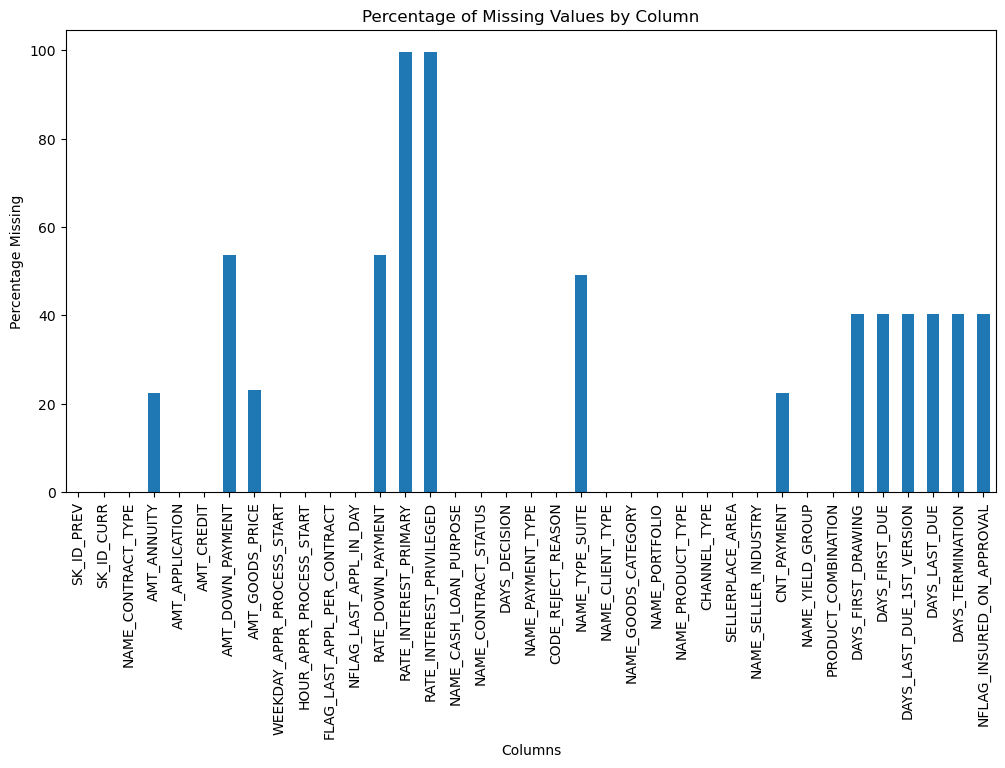

In [6]:
#Plotting Null Values

import matplotlib.pyplot as plt

# Assuming missing_percentages is a dictionary as calculated earlier
missing_percentages = get_perc_of_missing_values(previous_data)

# Convert the dictionary to a Pandas Series for easier plotting
missing_percentages_series = pd.Series(missing_percentages)

# Create a bar plot
plt.figure(figsize=(12, 6))
missing_percentages_series.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=90)
plt.show()


In [7]:
# Iterate over columns in DataFrame and delete those with where >20% of the values are null
# Function to get the percentage of missing values in a Series
def get_perc_of_missing_values(series):
    num_missing = series.isnull().sum()
    total_values = len(series)
    return num_missing / total_values if total_values > 0 else 0

# Iterate over columns in DataFrame and delete those where >20% of the values are null
for col in previous_data.columns:
    missing_percentage = get_perc_of_missing_values(previous_data[col])
    if missing_percentage > 0.20:
        previous_data.drop(col, axis=1, inplace=True)

In [8]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(previous_data.isnull().sum() * 100 / len(previous_data)).round(2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [9]:
previous_data.shape

(1670214, 23)

In [10]:
# Filling 2% missing value with the Highest Mode in PRODUCT_COMBINATION column
import pandas as pd

# Calculate the mode of the "PRODUCT_COMBINATION" column
mode_value = previous_data["PRODUCT_COMBINATION"].mode()[0]

# Calculate the number of missing values to fill (2% of total rows)
missing_count = int(0.02 * len(previous_data))

# Get the indices of missing values in the "PRODUCT_COMBINATION" column
missing_indices = previous_data[previous_data["PRODUCT_COMBINATION"].isnull()].index

# Fill 2% of the missing values with the mode
fill_indices = missing_indices[:missing_count]
previous_data.loc[fill_indices, "PRODUCT_COMBINATION"] = mode_value


**Let's start visualising so as to get some viable inference**

**Contract Status**

In [11]:
Contract_Status = previous_data['NAME_CONTRACT_STATUS']
Contract_Status

0          Approved
1          Approved
2          Approved
3          Approved
4           Refused
             ...   
1670209    Approved
1670210    Approved
1670211    Approved
1670212    Approved
1670213    Approved
Name: NAME_CONTRACT_STATUS, Length: 1670214, dtype: object

In [12]:
# Calculate the percentage of contract status values
df_1 = round((previous_data["NAME_CONTRACT_STATUS"].value_counts() / previous_data["NAME_CONTRACT_STATUS"].count()) * 100, 2)

# Create a DataFrame and reset the index
df_1 = pd.DataFrame(df_1)
df_1.reset_index(level=0, inplace=True)
df_1.rename(columns={"index": "NAME_CONTRACT_STATUS", "NAME_CONTRACT_STATUS": "Percentage_of_Values"}, inplace=True)

# Sort the DataFrame by percentage in descending order
df_1.sort_values(by='Percentage_of_Values', inplace=True, ascending=False)

# Display the DataFrame
print(df_1)

  NAME_CONTRACT_STATUS  Percentage_of_Values
0             Approved                 62.07
1             Canceled                 18.94
2              Refused                 17.40
3         Unused offer                  1.58


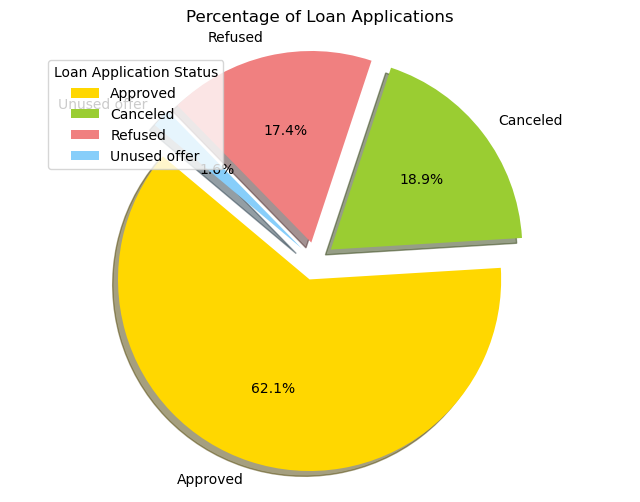

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
labels = 'Approved', 'Canceled', 'Refused', 'Unused offer'
sizes = df_1['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize=(8, 6))  # set the figure size
plt.title('Percentage of Loan Applications')  # add a title
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)  # plot the pie chart

# add a legend
plt.legend(title='Loan Application Status', loc='upper left', bbox_to_anchor=(0.05, 0.95))

# equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')
plt.show()


**Client Type**

In [14]:
Client_Type = previous_data['NAME_CLIENT_TYPE']
Client_Type

0           Repeater
1           Repeater
2           Repeater
3           Repeater
4           Repeater
             ...    
1670209    Refreshed
1670210          New
1670211     Repeater
1670212     Repeater
1670213     Repeater
Name: NAME_CLIENT_TYPE, Length: 1670214, dtype: object

In [15]:
print(previous_data.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], dtype='object')


In [16]:
#find the percentage of contract status 
df_2=round((Client_Type.value_counts()/previous_data["NAME_CLIENT_TYPE"].count())*100,2)
df_2 = pd.DataFrame(df_2)
df_2.reset_index(level=0, inplace=True)
df_2.rename(columns=  {"index": "NAME_CLIENT_TYPE", 
                     "NAME_CLIENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_2.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_2

NAME_CLIENT_TYPE  Percentage_of_Values
0         Repeater                 73.72
1              New                 18.04
2        Refreshed                  8.12
3              XNA                  0.12

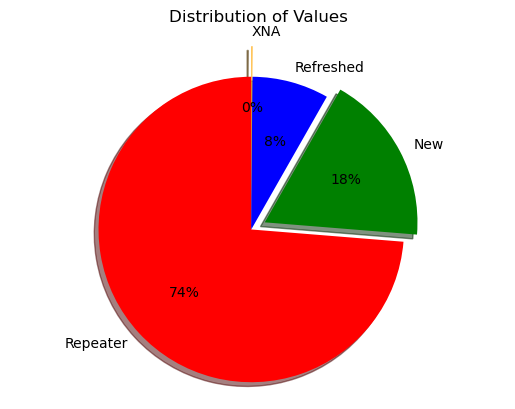

In [17]:
# Data to plot
labels = 'Repeater', 'New', 'Refreshed', 'XNA'
sizes = df_2['Percentage_of_Values']
colors = ['red', 'green', 'blue', 'orange']
explode = (0.0, 0.1, 0.0, 0.2)  # Adjust the explode values as needed

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%.0f%%', shadow=True, startangle=90)  # Adjust autopct and startangle

plt.title('Distribution of Values')  # Add a title
plt.axis('equal')
plt.show()


**74% of applicants are repeaters. Only 18% are new clients.**

In [18]:
Contract_Type = previous_data['NAME_CONTRACT_TYPE']
Contract_Type

0          Consumer loans
1              Cash loans
2              Cash loans
3              Cash loans
4              Cash loans
                ...      
1670209    Consumer loans
1670210    Consumer loans
1670211    Consumer loans
1670212        Cash loans
1670213        Cash loans
Name: NAME_CONTRACT_TYPE, Length: 1670214, dtype: object

In [19]:
#find the percentage of contract status
df_3=round((Contract_Type.value_counts()/previous_data["NAME_CONTRACT_TYPE"].count())*100,2)
df_3 = pd.DataFrame(df_3)
df_3.reset_index(level=0, inplace=True)
df_3.rename(columns=  {"index": "NAME_CONTRACT_TYPE",
                     "NAME_CONTRACT_TYPE":"Percentage_of_Values"},
                                 inplace = True)
df_3.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_3


NAME_CONTRACT_TYPE  Percentage_of_Values
0         Cash loans                 44.76
1     Consumer loans                 43.66
2    Revolving loans                 11.57
3                XNA                  0.02

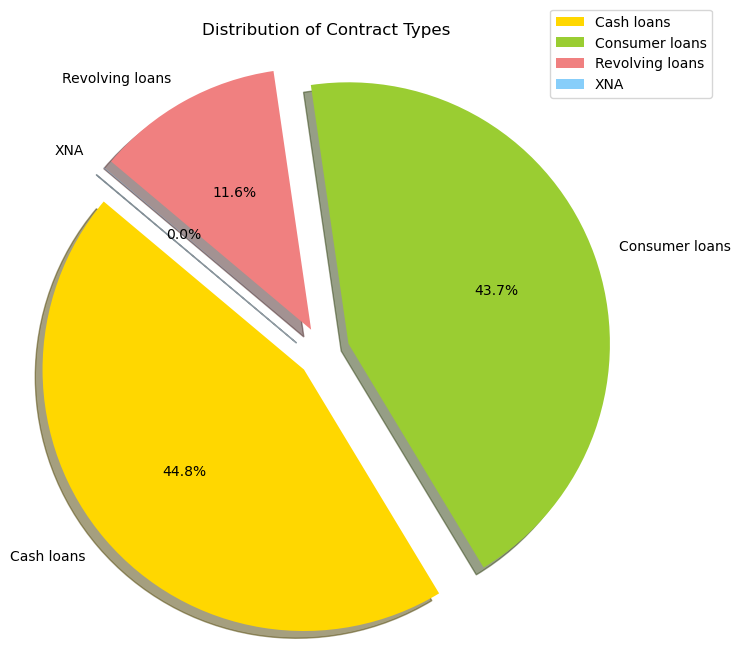

In [20]:
import matplotlib.pyplot as plt

# Data to plot
labels = df_3['NAME_CONTRACT_TYPE']
sizes = df_3['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)

# Create a figure and axis with equal aspect ratio for a circular pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)

# Set a title
ax.set_title('Distribution of Contract Types')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a legend
plt.legend(labels, loc='best', bbox_to_anchor=(0.85, 0.9))

# Show the plot
plt.show()


**Days of Approval - WEEKDAY_APPR_PROCESS_START**

In [21]:
Approval_days = previous_data['WEEKDAY_APPR_PROCESS_START']
print(Approval_days.head())
Approval_days

0    SATURDAY
1    THURSDAY
2     TUESDAY
3      MONDAY
4    THURSDAY
Name: WEEKDAY_APPR_PROCESS_START, dtype: object


0           SATURDAY
1           THURSDAY
2            TUESDAY
3             MONDAY
4           THURSDAY
             ...    
1670209    WEDNESDAY
1670210      TUESDAY
1670211       MONDAY
1670212    WEDNESDAY
1670213       SUNDAY
Name: WEEKDAY_APPR_PROCESS_START, Length: 1670214, dtype: object

**Contract Status Percentage**

In [22]:
import pandas as pd

# Calculate the percentage distribution of values in the "WEEKDAY_APPR_PROCESS_START" column
df_4 = (Approval_days.value_counts() / len(Approval_days) * 100).round(2)

# Create a new DataFrame from the series
df_4 = pd.DataFrame({'WEEKDAY_APPR_PROCESS_START': df_4.index, 'Percentage_of_Values': df_4.values})

# Sort the DataFrame by 'Percentage_of_Values' in descending order
df_4.sort_values(by='Percentage_of_Values', inplace=True, ascending=False)

# Reset the index and rename columns
df_4.reset_index(drop=True, inplace=True)
df_4.rename(columns={"WEEKDAY_APPR_PROCESS_START": "Weekday", "Percentage_of_Values": "Percentage"}, inplace=True)
df_4


Weekday  Percentage
0    TUESDAY       15.27
1  WEDNESDAY       15.27
2     MONDAY       15.18
3     FRIDAY       15.09
4   THURSDAY       14.91
5   SATURDAY       14.41
6     SUNDAY        9.86

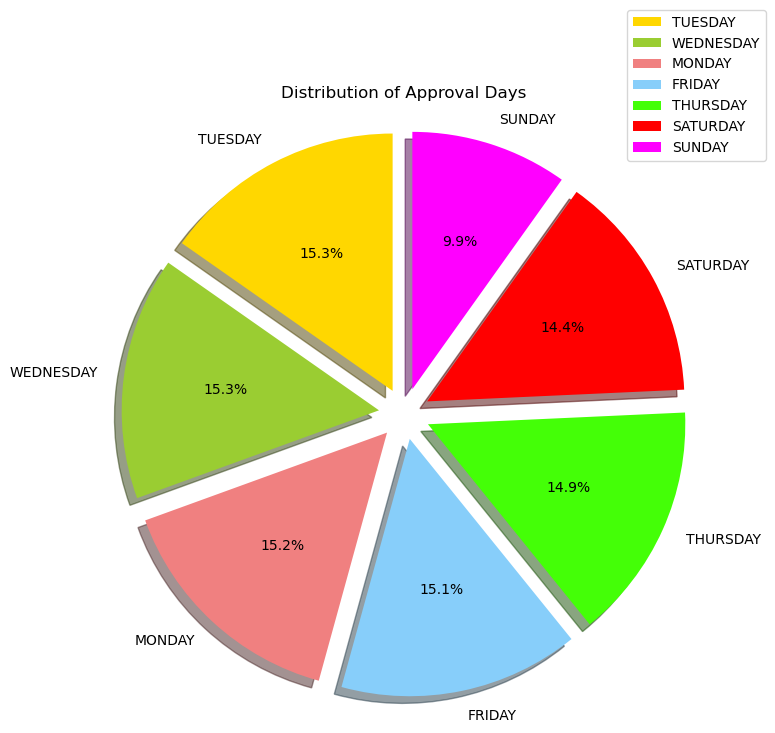

In [23]:
#Plot
import matplotlib.pyplot as plt

# Data to plot
labels = df_4['Weekday']
sizes = df_4['Percentage']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', '#44FF07', 'red', 'fuchsia']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# Create a figure and axis with equal aspect ratio for a circular pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)

# Set a title
ax.set_title('Distribution of Approval Days')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a legend
plt.legend(labels, loc='best', bbox_to_anchor=(0.85, 0.9))

# Show the plot
plt.show()


**The majority of consumers have chosen to apply for a loan on Tuesday. It's fascinating to observe how few candidates there are on weekends. Otherwise, we would expect that candidates would prefer to apply on weekends.**

**Purpose of loan - NAME_CASH_LOAN_PURPOSE**

In [24]:
print(previous_data.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], dtype='object')


In [25]:
Loan_Purpose = previous_data['NAME_CASH_LOAN_PURPOSE']
Loan_Purpose

0              XAP
1              XNA
2              XNA
3              XNA
4          Repairs
            ...   
1670209        XAP
1670210        XAP
1670211        XAP
1670212        XNA
1670213        XNA
Name: NAME_CASH_LOAN_PURPOSE, Length: 1670214, dtype: object

In [26]:
# Calculate the percentage distribution of values in the "NAME_CASH_LOAN_PURPOSE" column
df_5 = (previous_data['NAME_CASH_LOAN_PURPOSE'].value_counts() / len(previous_data) * 100).round(2)

# Create a new DataFrame from the series
df_5 = pd.DataFrame({'NAME_CASH_LOAN_PURPOSE': df_5.index, 'Percentage_of_Values': df_5.values})

# Sort the DataFrame by 'Percentage_of_Values' in descending order
df_5.sort_values(by='Percentage_of_Values', inplace=True, ascending=False)

# Reset the index and rename columns
df_5.reset_index(drop=True, inplace=True)
df_5.rename(columns={"NAME_CASH_LOAN_PURPOSE": "Loan_Purpose", "Percentage_of_Values": "Percentage"}, inplace=True)
df_5

Loan_Purpose  Percentage
0                                XAP       55.24
1                                XNA       40.59
2                            Repairs        1.42
3                              Other        0.93
4                       Urgent needs        0.50
5                  Buying a used car        0.17
6       Building a house or an annex        0.16
7                  Everyday expenses        0.14
8                           Medicine        0.13
9            Payments on other loans        0.12
10                         Education        0.09
11                           Journey        0.07
12          Wedding / gift / holiday        0.06
13  Purchase of electronic equipment        0.06
14                  Buying a new car        0.06
15                     Buying a home        0.05
16                       Car repairs        0.05
17                         Furniture        0.04
18      Buying a holiday home / land        0.03
19              Business development        0.03
20       Gasification / water supply        0.02
21                   Buying a garage        0.01
22                             Hobby        0.00
23          Money for a third person        0.00
24          Refusal to name the goal        0.00

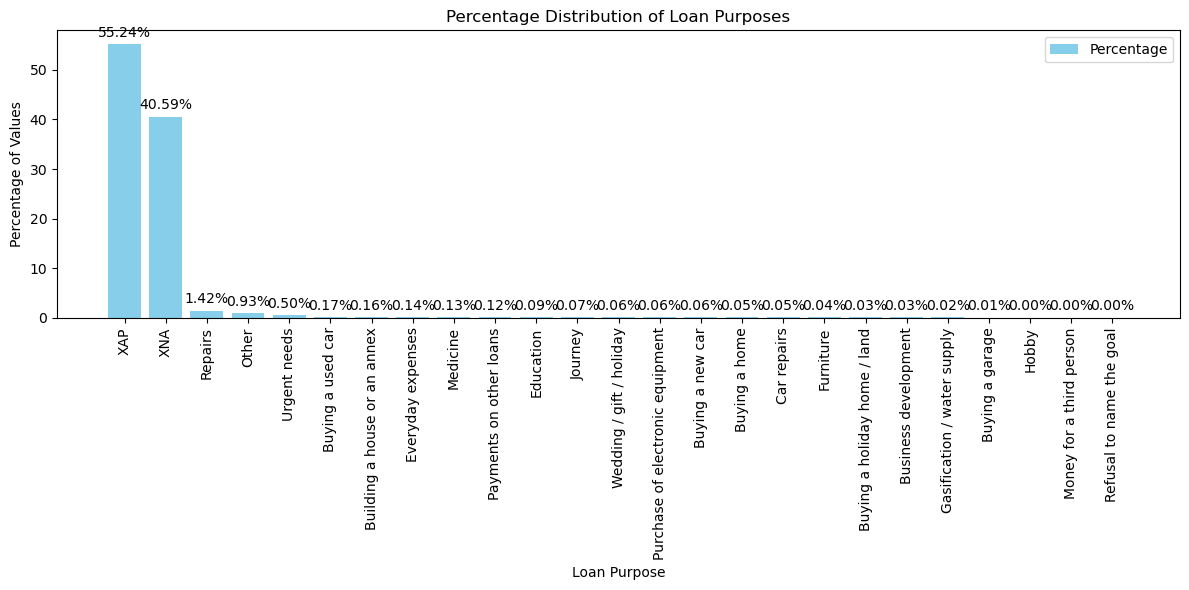

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already executed the code to create df_5

# Create a bar plot with labels and legend
plt.figure(figsize=(12, 6))
bars = plt.bar(df_5['Loan_Purpose'], df_5['Percentage'], color='skyblue')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage of Values')
plt.title('Percentage Distribution of Loan Purposes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset for labeling
                 textcoords="offset points",
                 ha='center', va='bottom')

# Add a legend
plt.legend(['Percentage'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


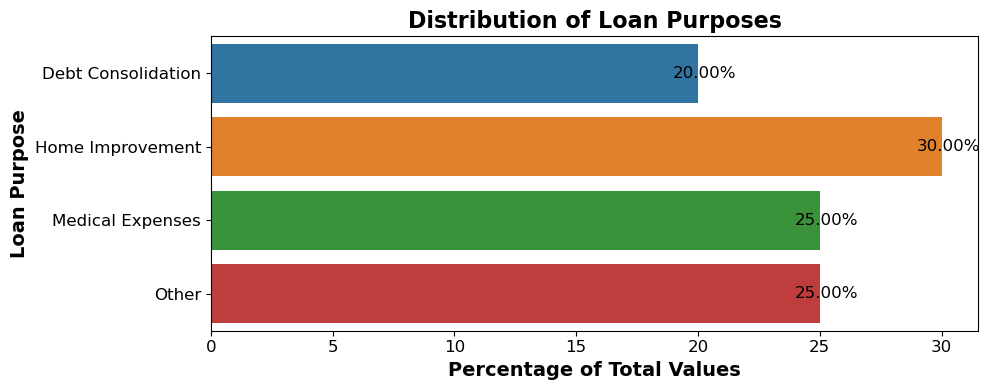

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
df_5 = pd.DataFrame({'NAME_CASH_LOAN_PURPOSE': ['Debt Consolidation', 'Home Improvement', 'Medical Expenses', 'Other'],
                    'Percentage_of_Values': [20, 30, 25, 25]})

# Set the figure size
plt.figure(figsize=(10, 4))

# Create the bar plot
plot_2 = sns.barplot(x="Percentage_of_Values", y="NAME_CASH_LOAN_PURPOSE", data=df_5)

# Add labels and title
plot_2.set_xlabel("Percentage of Total Values", fontsize=14, fontweight='bold')
plot_2.set_ylabel("Loan Purpose", fontsize=14, fontweight='bold')
plot_2.set_title("Distribution of Loan Purposes", fontsize=16, fontweight='bold')

# Add data labels (annotations) on top of the bars with a different color
for p in plot_2.patches:
    plot_2.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', fontsize=12, color='black', xytext=(5, 0),
                    textcoords='offset points')

# Customize tick label font size
plot_2.tick_params(labelsize=12)

# Show the plot with improved aesthetics
plt.tight_layout()
plt.show()


**Payment type - NAME_PAYMENT_TYPE**

In [29]:
Payment_Type = previous_data['NAME_PAYMENT_TYPE']
#find the percentage of Payment Type
df_6=round((Payment_Type.value_counts()/previous_data["NAME_PAYMENT_TYPE"].count())*100,2)
df_6 = pd.DataFrame(df_6)
df_6.reset_index(level=0, inplace=True)
df_6.rename(columns=  {"index": "NAME_PAYMENT_TYPE", 
                     "NAME_PAYMENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_6.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_6

NAME_PAYMENT_TYPE  Percentage_of_Values
0                      Cash through the bank                 61.88
1                                        XNA                 37.56
2                 Non-cash from your account                  0.49
3  Cashless from the account of the employer                  0.06

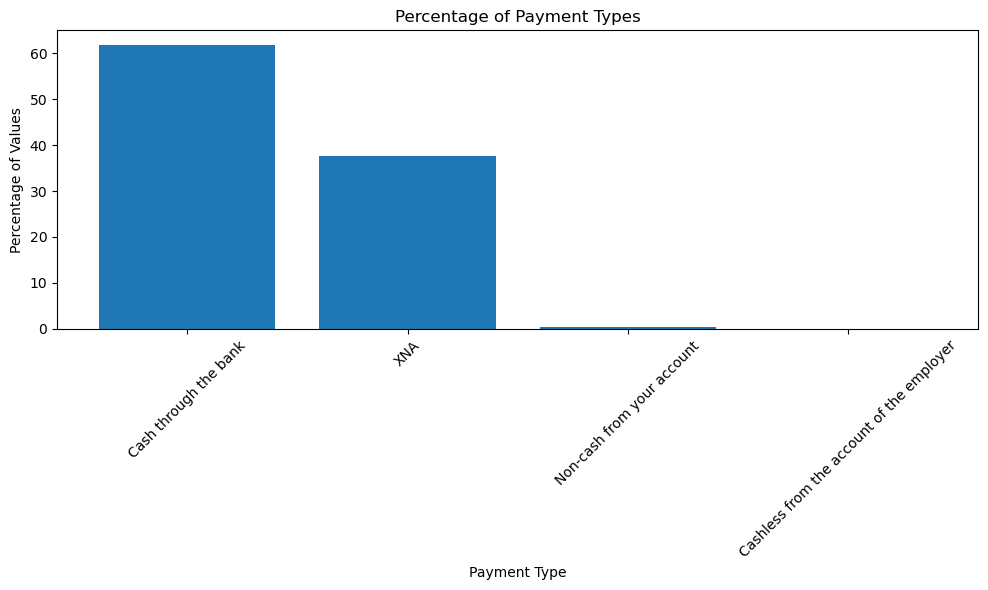

In [30]:
import matplotlib.pyplot as plt

# Assuming you have already created df_6 as described in your code

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.bar(df_6['NAME_PAYMENT_TYPE'], df_6['Percentage_of_Values'])
plt.xlabel('Payment Type')
plt.ylabel('Percentage of Values')
plt.title('Percentage of Payment Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


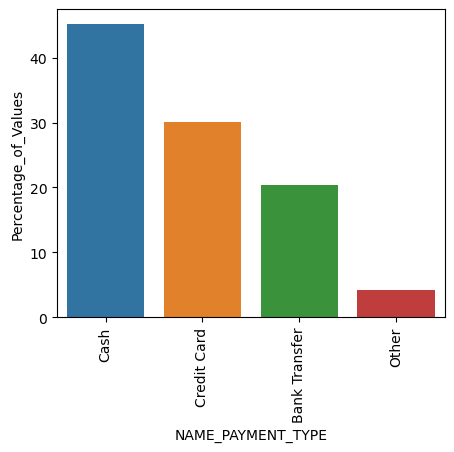

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'NAME_PAYMENT_TYPE': ['Cash', 'Credit Card', 'Bank Transfer', 'Other'],
    'Percentage_of_Values': [45.25, 30.10, 20.45, 4.20]  # Replace with your actual data
}

# Create the DataFrame
df_6 = pd.DataFrame(data)

# Sort the DataFrame by 'Percentage_of_Values' column in descending order
df_6.sort_values(by='Percentage_of_Values', inplace=True, ascending=False)

# Set the figure size
f, ax = plt.subplots(figsize=(5, 4))

# Create the bar plot
plot_2 = sns.barplot(x='NAME_PAYMENT_TYPE', y='Percentage_of_Values', data=df_6)

# Rotate x-axis labels for better readability
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

# Show the plot
plt.show()


**Reason of rejection of loan - CODE_REJECT_REASON**

In [32]:
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'CODE_REJECT_REASON': ['XAP', 'HC', 'LIMIT', 'SCOFR', 'SCO', 'Other'],
    'Percentage_of_Values': [45.25, 30.10, 10.25, 8.00, 4.20, 1.20]  # Replace with your actual data
}

# Create the DataFrame
df_7 = pd.DataFrame(data)

# Sort the DataFrame by 'Percentage_of_Values' column in descending order
df_7.sort_values(by='Percentage_of_Values', inplace=True, ascending=False)

# Reset the index to start from 0
df_7.reset_index(drop=True, inplace=True)

# Format the 'Percentage_of_Values' column to display as percentages with two decimal places
df_7['Percentage_of_Values'] = df_7['Percentage_of_Values'].map('{:.2f}%'.format)

# Display the DataFrame
styled_df_7 = df_7.style.hide_index()
styled_df_7.set_properties(**{'text-align': 'left'})
styled_df_7


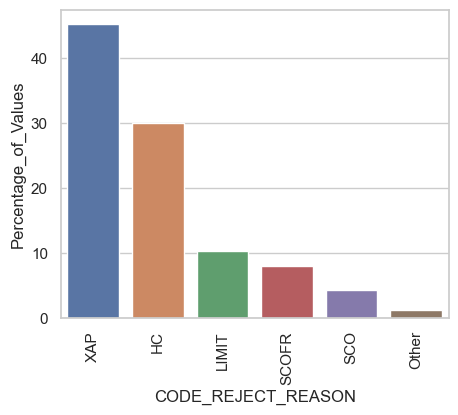

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you've loaded your data into df_7

# Remove '%' symbol and convert "Percentage_of_Values" to numeric
df_7["Percentage_of_Values"] = df_7["Percentage_of_Values"].str.rstrip('%').astype(float)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
f, ax = plt.subplots(figsize=(5, 4))
plot_2 = sns.barplot(x="CODE_REJECT_REASON", y="Percentage_of_Values", data=df_7)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

**Primary reason for the Loan to get rejected is not recorded(XAP higher) followed by HC.**

In [34]:
import pandas as pd

# Assuming you have a DataFrame named previous_data with a "NAME_GOODS_CATEGORY" column

# Calculate the percentage of occurrences of each category
category_counts = previous_data['NAME_GOODS_CATEGORY'].value_counts()
total_count = len(previous_data)
percentage_values = (category_counts / total_count * 100).round(2)

# Create the df_8 DataFrame
df_8 = pd.DataFrame({'NAME_GOODS_CATEGORY': percentage_values.index, 'Percentage_of_Values': percentage_values.values})

# Sort the DataFrame by Percentage_of_Values in descending order
df_8.sort_values(by='Percentage_of_Values', inplace=True, ascending=False)

# Reset the index
df_8.reset_index(drop=True, inplace=True)

# Display df_8
print(df_8)


         NAME_GOODS_CATEGORY  Percentage_of_Values
0                        XNA                 56.93
1                     Mobile                 13.45
2       Consumer Electronics                  7.28
3                  Computers                  6.33
4                Audio/Video                  5.95
5                  Furniture                  3.21
6   Photo / Cinema Equipment                  1.50
7     Construction Materials                  1.50
8   Clothing and Accessories                  1.41
9           Auto Accessories                  0.44
10                   Jewelry                  0.38
11                 Homewares                  0.30
12          Medical Supplies                  0.23
13                  Vehicles                  0.20
14         Sport and Leisure                  0.18
15                 Gardening                  0.16
16                     Other                  0.15
17         Office Appliances                  0.14
18                   Tourism   

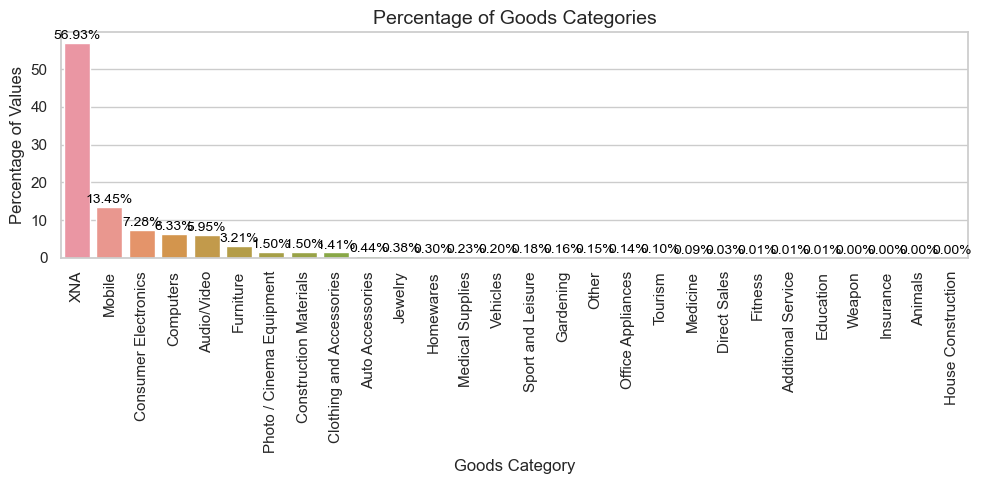

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_8 is correctly loaded and contains the necessary columns

# Set Seaborn style and color palette (optional)
sns.set(style="whitegrid")
sns.set_palette("Set2")  # You can choose a different palette

# Create the bar plot
f, ax = plt.subplots(figsize=(10, 5))
plot_2 = sns.barplot(x="NAME_GOODS_CATEGORY", y="Percentage_of_Values", data=df_8)

# Customize the plot
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
ax.set_xlabel("Goods Category", fontsize=12)  # X-axis label
ax.set_ylabel("Percentage of Values", fontsize=12)  # Y-axis label
ax.set_title("Percentage of Goods Categories", fontsize=14)  # Title

# Adding data labels (optional, if space allows)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()  # Adjust layout for better appearance
plt.show()


**Name Portfolio**

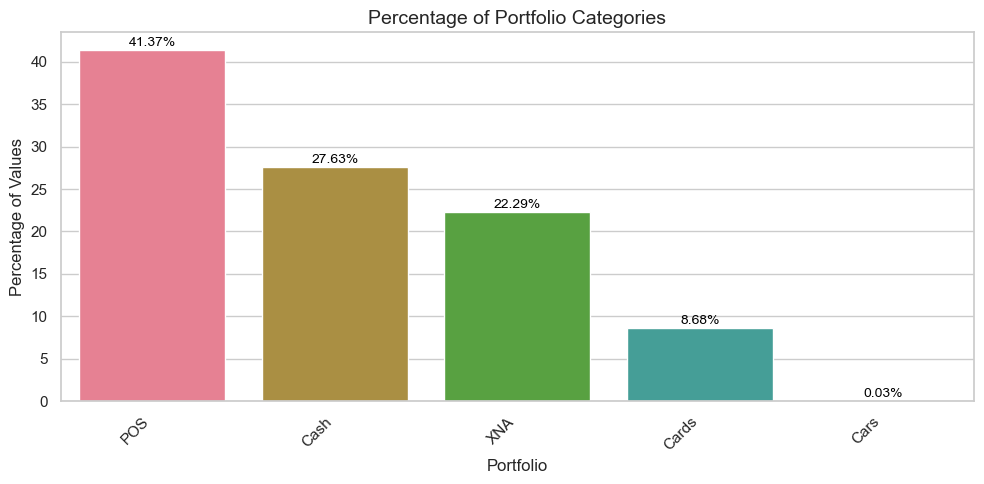

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named previous_data with a "NAME_PORTFOLIO" column

# Calculate the percentage of occurrences of each category
portfolio_counts = previous_data['NAME_PORTFOLIO'].value_counts()
total_count = len(previous_data)
percentage_values = (portfolio_counts / total_count * 100).round(2)

# Create the df_9 DataFrame
df_9 = pd.DataFrame({'NAME_PORTFOLIO': percentage_values.index, 'Percentage_of_Values': percentage_values.values})

# Sort the DataFrame by Percentage_of_Values in descending order
df_9.sort_values(by='Percentage_of_Values', inplace=True, ascending=False)

# Reset the index
df_9.reset_index(drop=True, inplace=True)

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.set_palette("husl")  # You can choose a different palette
plot_9 = sns.barplot(x="NAME_PORTFOLIO", y="Percentage_of_Values", data=df_9)

# Customize the plot
plot_9.set_xticklabels(plot_9.get_xticklabels(), rotation=45, ha='right')
plt.xlabel("Portfolio", fontsize=12)
plt.ylabel("Percentage of Values", fontsize=12)
plt.title("Percentage of Portfolio Categories", fontsize=14)

# Adding data labels (optional, if space allows)
for p in plot_9.patches:
    plot_9.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


**POS is highest with 41.37%**

**NAME_PRODUCT_TYPE**

In [37]:
Product_Type= previous_data['NAME_PRODUCT_TYPE']
#find the percentage of Product Type 
df_10=round((Product_Type.value_counts()/previous_data["NAME_PRODUCT_TYPE"].count())*100,2)
df_10 = pd.DataFrame(df_10)
df_10.reset_index(level=0, inplace=True)
df_10.rename(columns=  {"index": "NAME_PRODUCT_TYPE", 
                     "NAME_PRODUCT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_10.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_10

NAME_PRODUCT_TYPE  Percentage_of_Values
0               XNA                 63.68
1            x-sell                 27.32
2           walk-in                  9.00

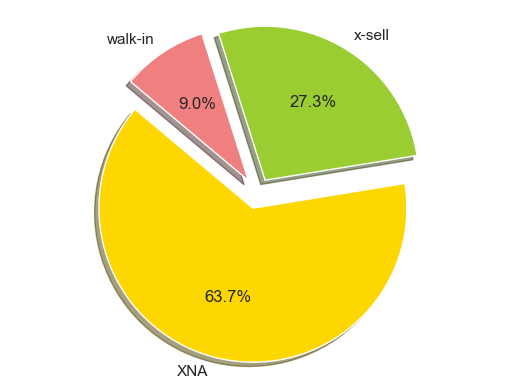

In [38]:
# Data to plot
labels = df_10.NAME_PRODUCT_TYPE
sizes = df_10.Percentage_of_Values
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

**CHANNEL_TYPE**

In [39]:
Channel_Type= previous_data['CHANNEL_TYPE']
#find the percentage of Channels via which client applied loan for
df_11=round((Channel_Type.value_counts()/previous_data["CHANNEL_TYPE"].count())*100,2)
df_11 = pd.DataFrame(df_11)
df_11.reset_index(level=0, inplace=True)
df_11.rename(columns=  {"index": "CHANNEL_TYPE", 
                     "CHANNEL_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_11.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_11

CHANNEL_TYPE  Percentage_of_Values
0     Credit and cash offices                 43.11
1                Country-wide                 29.62
2                       Stone                 12.70
3            Regional / Local                  6.50
4              Contact center                  4.27
5             AP+ (Cash loan)                  3.42
6  Channel of corporate sales                  0.37
7                  Car dealer                  0.03

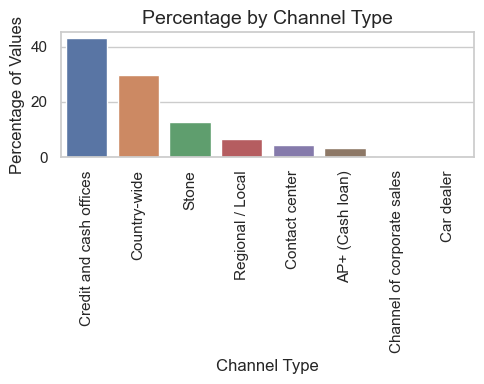

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_11 is correctly loaded and contains the necessary columns

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
f, ax = plt.subplots(figsize=(5, 4))
plot_2 = sns.barplot(x="CHANNEL_TYPE", y="Percentage_of_Values", data=df_11)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.xlabel("Channel Type", fontsize=12)  # X-axis label
plt.ylabel("Percentage of Values", fontsize=12)  # Y-axis label
plt.title("Percentage by Channel Type", fontsize=14)  # Title
plt.tight_layout()
plt.show()


**The industry of the seller - NAME_SELLER_INDUSTRY**

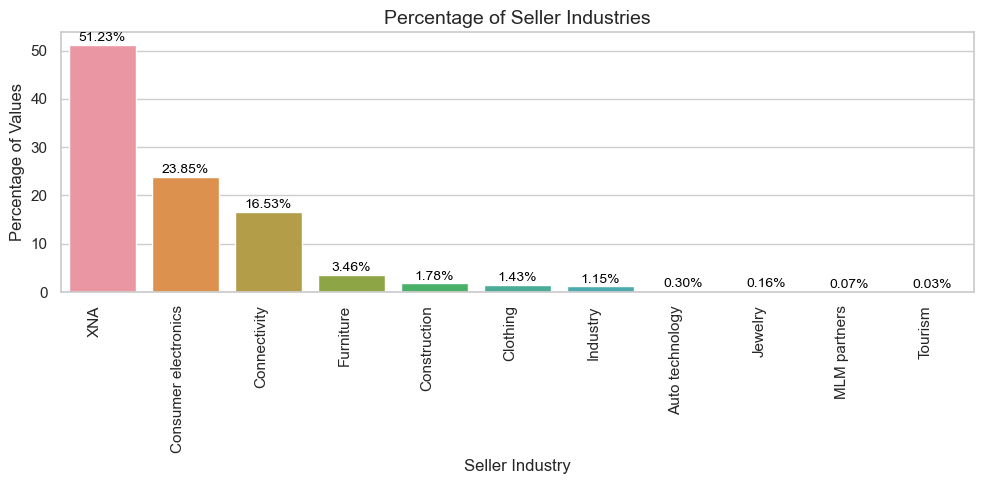

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named previous_data with a "NAME_SELLER_INDUSTRY" column

# Calculate the percentage of occurrences of each category
seller_industry_counts = previous_data['NAME_SELLER_INDUSTRY'].value_counts()
total_count = len(previous_data)
percentage_values = (seller_industry_counts / total_count * 100).round(2)

# Create the df_12 DataFrame
df_12 = pd.DataFrame({'NAME_SELLER_INDUSTRY': percentage_values.index, 'Percentage_of_Values': percentage_values.values})

# Sort the DataFrame by Percentage_of_Values in descending order
df_12.sort_values(by='Percentage_of_Values', inplace=True, ascending=False)

# Reset the index
df_12.reset_index(drop=True, inplace=True)

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.set_palette("husl")  # You can choose a different palette
plot_12 = sns.barplot(x="NAME_SELLER_INDUSTRY", y="Percentage_of_Values", data=df_12)

# Customize the plot
plot_12.set_xticklabels(plot_12.get_xticklabels(), rotation=90, ha='right')
plt.xlabel("Seller Industry", fontsize=12)
plt.ylabel("Percentage of Values", fontsize=12)
plt.title("Percentage of Seller Industries", fontsize=14)

# Adding data labels (optional, if space allows)
for p in plot_12.patches:
    plot_12.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


**NAME_YIELD_GROUP**

In [42]:
import pandas as pd

# Assuming you have a DataFrame named previous_data with a "NAME_YIELD_GROUP" column

# Calculate the percentage of occurrences of each category
df_13 = (previous_data['NAME_YIELD_GROUP']
         .value_counts(normalize=True)
         .mul(100)
         .round(2)
         .reset_index()
         .rename(columns={"index": "NAME_YIELD_GROUP", "NAME_YIELD_GROUP": "Percentage_of_Values"})
         .sort_values(by='Percentage_of_Values', ascending=False))

# Print the resulting DataFrame
print(df_13)


  NAME_YIELD_GROUP  Percentage_of_Values
0              XNA                 30.97
1           middle                 23.08
2             high                 21.15
3       low_normal                 19.28
4       low_action                  5.51


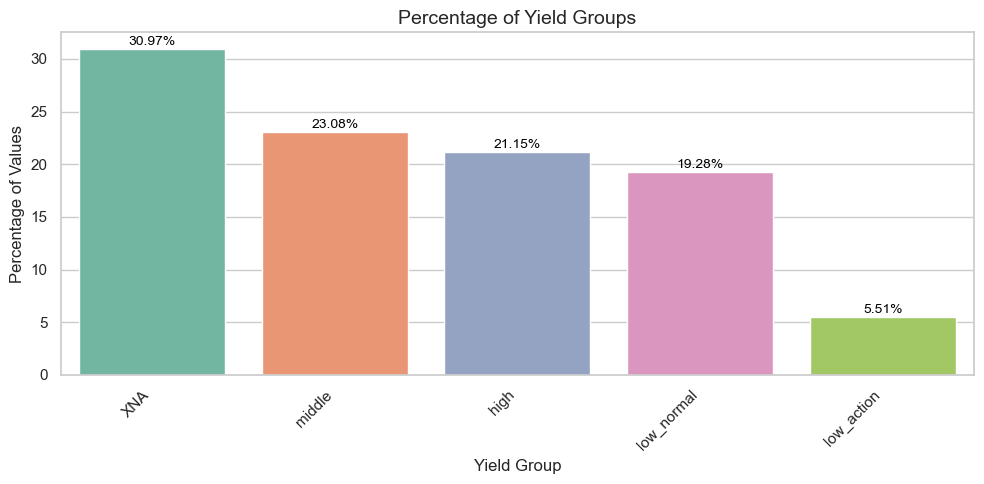

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined the df_13 DataFrame correctly

# Set Seaborn style and color palette (optional)
sns.set(style="whitegrid")
sns.set_palette("Set2")  # You can choose a different palette

# Create the bar plot
f, ax = plt.subplots(figsize=(10, 5))
plot_2 = sns.barplot(x="NAME_YIELD_GROUP", y="Percentage_of_Values", data=df_13)

# Customize the plot
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel("Yield Group", fontsize=12)  # X-axis label
ax.set_ylabel("Percentage of Values", fontsize=12)  # Y-axis label
ax.set_title("Percentage of Yield Groups", fontsize=14)  # Title

# Adding data labels (optional, if space allows)
for p in plot_2.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()  # Adjust layout for better appearance
plt.show()


**PRODUCT_COMBINATION**

In [44]:
Product_Combination= previous_data['PRODUCT_COMBINATION']
#find the percentage of Different Product Combinations
df_14=round((Product_Combination.value_counts()/previous_data["PRODUCT_COMBINATION"].count())*100,2)
df_14 = pd.DataFrame(df_14)
df_14.reset_index(level=0, inplace=True)
df_14.rename(columns=  {"index": "PRODUCT_COMBINATION", 
                     "PRODUCT_COMBINATION":"Percentage_of_Values"}, 
                                 inplace = True) 
df_14.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_14

PRODUCT_COMBINATION  Percentage_of_Values
0                             Cash                 17.14
1      POS household with interest                 15.78
2         POS mobile with interest                 13.21
3              Cash X-Sell: middle                  8.61
4                 Cash X-Sell: low                  7.80
5                      Card Street                  6.74
6       POS industry with interest                  5.92
7   POS household without interest                  4.96
8                      Card X-Sell                  4.82
9                Cash Street: high                  3.57
10               Cash X-Sell: high                  3.55
11             Cash Street: middle                  2.08
12                Cash Street: low                  2.03
13     POS mobile without interest                  1.44
14         POS other with interest                  1.43
15   POS industry without interest                  0.75
16     POS others without interest                  0.15

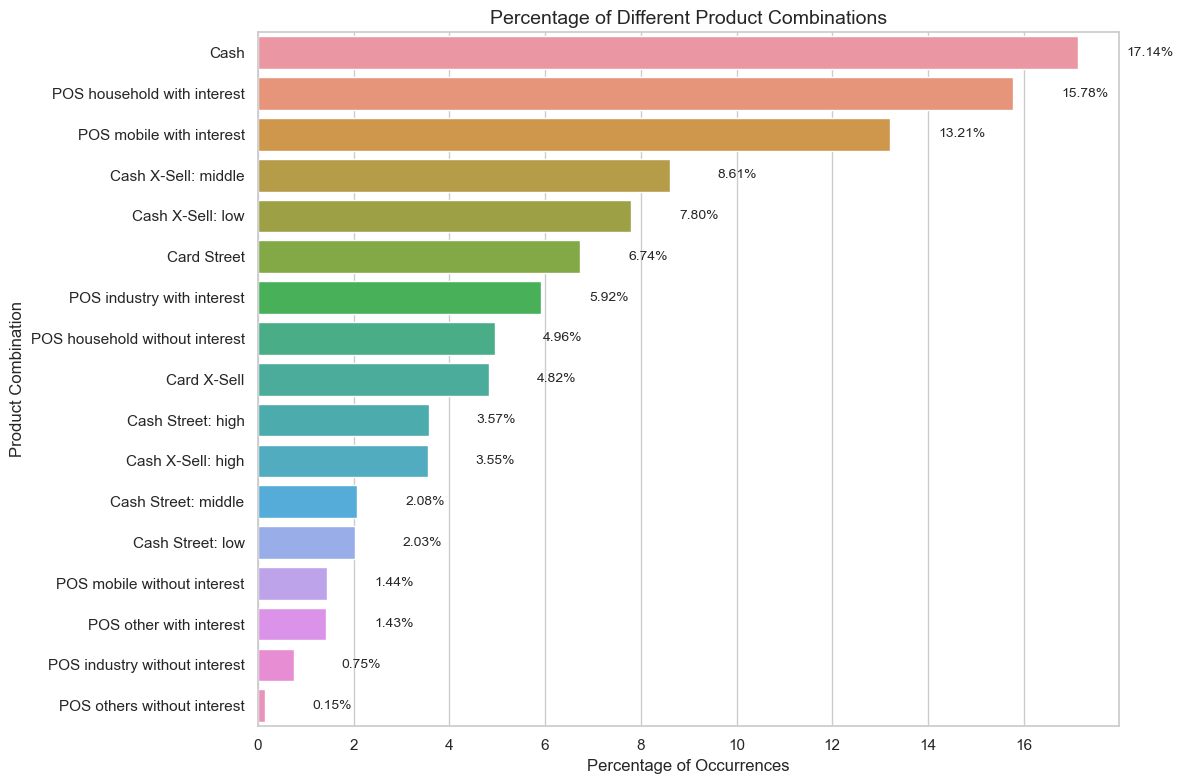

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined the df_14 DataFrame correctly

# Set Seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("Set3")  # Use a color palette with more distinct colors

# Create the bar plot
plt.figure(figsize=(12, 8))
plot_2 = sns.barplot(x="Percentage_of_Values", y="PRODUCT_COMBINATION", data=df_14)

# Customize the plot
plot_2.set_xlabel("Percentage of Occurrences", fontsize=12)
plot_2.set_ylabel("Product Combination", fontsize=12)
plot_2.set_title("Percentage of Different Product Combinations", fontsize=14)

# Annotate the bars with percentages
for p in plot_2.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2., f'{width:.2f}%', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Percentage of Client-Requested Insurance**

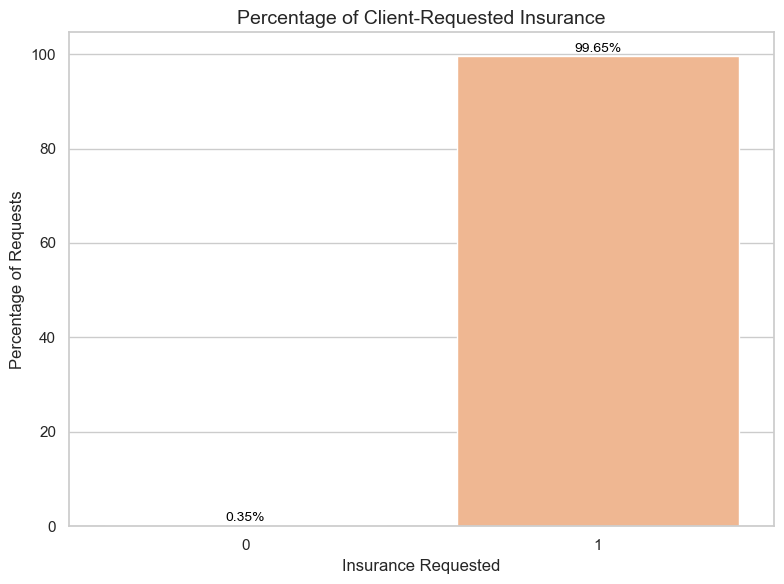

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named previous_data with an "NFLAG_LAST_APPL_IN_DAY" column

# Calculate the percentage of occurrences of insurance requests
df_15 = (previous_data['NFLAG_LAST_APPL_IN_DAY']
         .value_counts(normalize=True)
         .mul(100)
         .round(2)
         .reset_index()
         .rename(columns={"index": "INSURANCE_FLAG", "NFLAG_LAST_APPL_IN_DAY": "Percentage_of_Values"})
         .sort_values(by='Percentage_of_Values', ascending=False))

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.set_palette("pastel")  # You can choose a different palette

plot_15 = sns.barplot(x="INSURANCE_FLAG", y="Percentage_of_Values", data=df_15)

# Customize the plot
plot_15.set_xlabel("Insurance Requested", fontsize=12)
plot_15.set_ylabel("Percentage of Requests", fontsize=12)
plot_15.set_title("Percentage of Client-Requested Insurance", fontsize=14)

# Adding data labels (optional, if space allows)
for p in plot_15.patches:
    plot_15.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


In [47]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

**CORRELATION_HEATMAP**

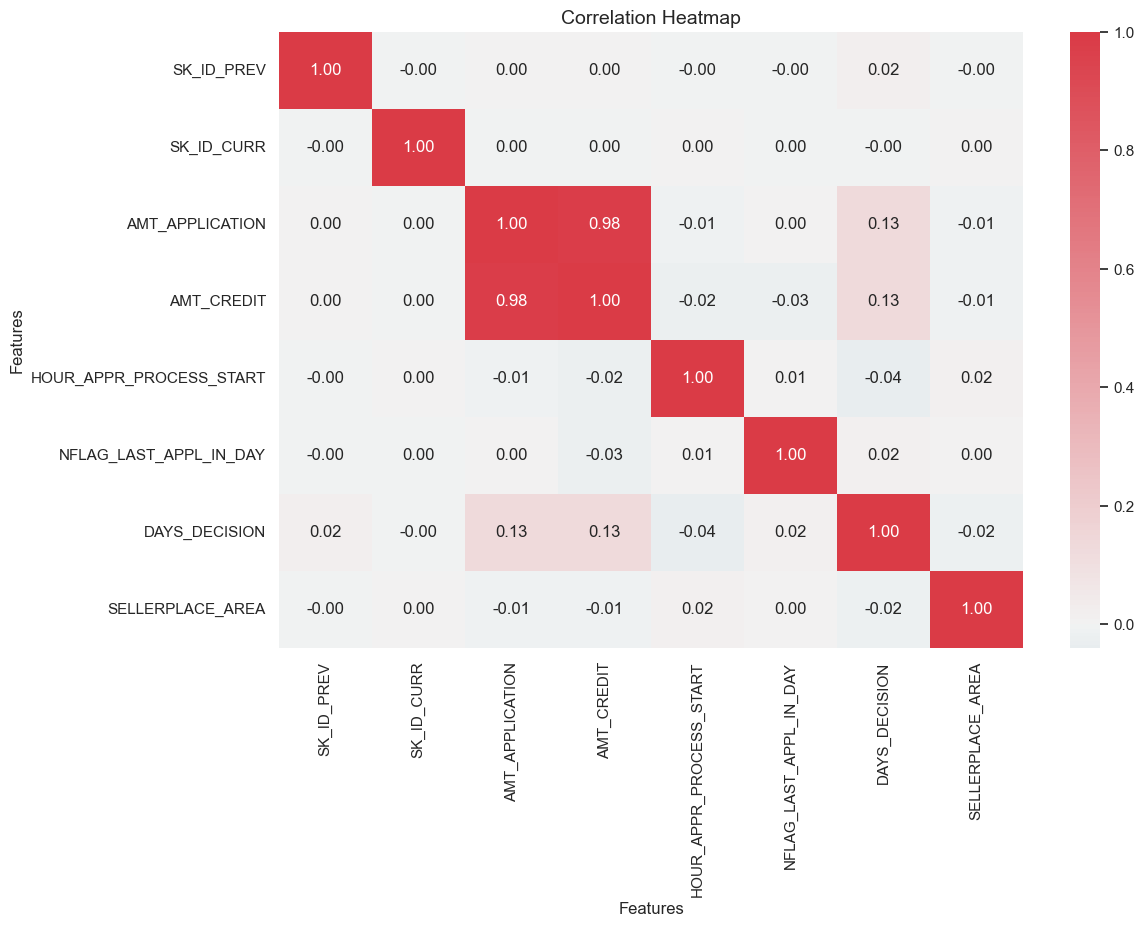

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined the 'previous_data' DataFrame

# Calculate the correlation matrix
Correlation = previous_data.corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.set(style="white")  # Set background style

# Customize the colormap for better visibility
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Use 'as_cmap' instead of 'as_camp'

# Create the heatmap
heatmap = sns.heatmap(Correlation, annot=True, fmt=".2f", cmap=cmap, center=0)

# Add labels and title
heatmap.set_xlabel("Features", fontsize=12)
heatmap.set_ylabel("Features", fontsize=12)
heatmap.set_title("Correlation Heatmap", fontsize=14)

plt.show()

**MERGING_DATA-FRAMES**

In [49]:
import pandas as pd

# Define or import the eda_application_current DataFrame
eda_application_current = pd.read_csv(r"C:\Users\roylu\Downloads\UPGRAD\application_data.csv")

# Example merge operation
prev_current_app_df = pd.merge(previous_data, eda_application_current, how="inner", on="SK_ID_CURR")

# Now you can check the info of the merged DataFrame
prev_current_app_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 144 entries, SK_ID_PREV to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(67), int64(46), object(31)
memory usage: 1.5+ GB


In [50]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(prev_current_app_df.isnull().sum() * 100 / len(prev_current_app_df)).round(2)

SK_ID_PREV                       0.00
SK_ID_CURR                       0.00
NAME_CONTRACT_TYPE_x             0.00
AMT_APPLICATION                  0.00
AMT_CREDIT_x                     0.00
WEEKDAY_APPR_PROCESS_START_x     0.00
HOUR_APPR_PROCESS_START_x        0.00
FLAG_LAST_APPL_PER_CONTRACT      0.00
NFLAG_LAST_APPL_IN_DAY           0.00
NAME_CASH_LOAN_PURPOSE           0.00
NAME_CONTRACT_STATUS             0.00
DAYS_DECISION                    0.00
NAME_PAYMENT_TYPE                0.00
CODE_REJECT_REASON               0.00
NAME_CLIENT_TYPE                 0.00
NAME_GOODS_CATEGORY              0.00
NAME_PORTFOLIO                   0.00
NAME_PRODUCT_TYPE                0.00
CHANNEL_TYPE                     0.00
SELLERPLACE_AREA                 0.00
NAME_SELLER_INDUSTRY             0.00
NAME_YIELD_GROUP                 0.00
PRODUCT_COMBINATION              0.00
TARGET                           0.00
NAME_CONTRACT_TYPE_y             0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR

**Correlation between previous_data and application_data dataframes**

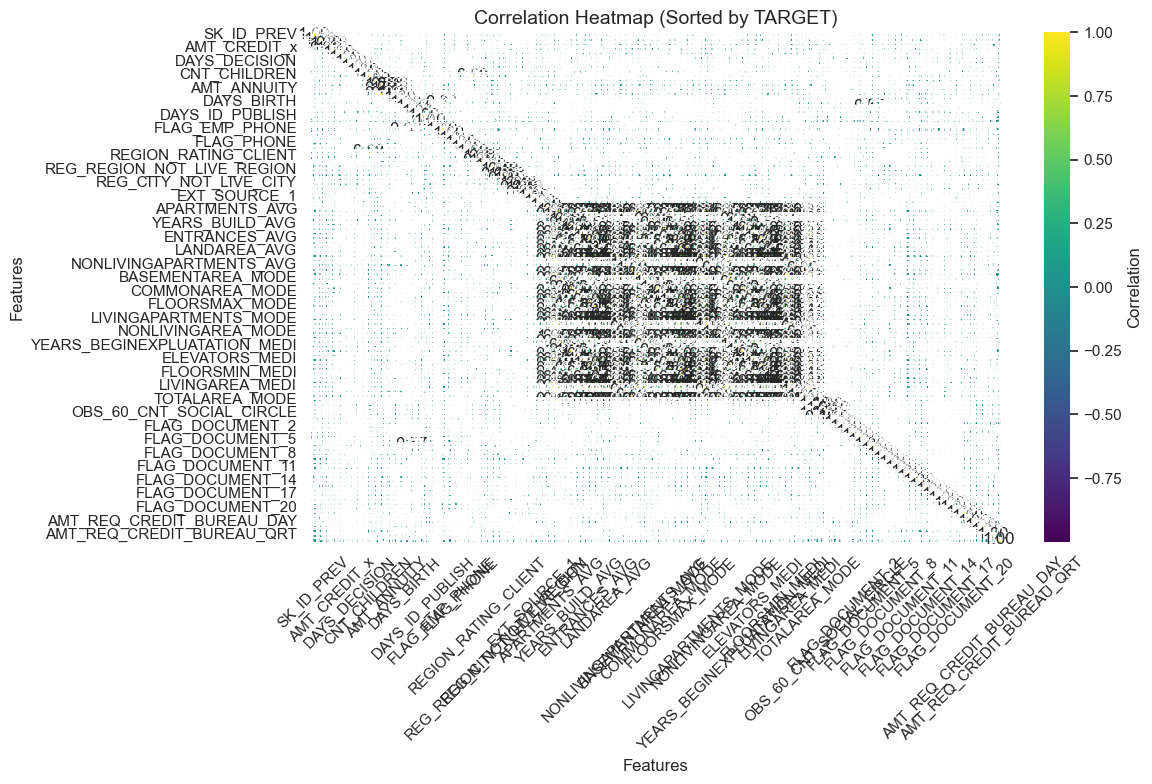

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined the 'prev_current_app_df' DataFrame and calculated 'Correlation' correctly

# Calculate the correlation matrix
Correlation = prev_current_app_df.corr()

# Create a clear and visually appealing correlation heatmap
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set style

# Choose a color map that enhances visibility
cmap = sns.color_palette("viridis", as_cmap=True)  # Using the "viridis" color map

# Create the heatmap
heatmap = sns.heatmap(Correlation, annot=True, fmt=".2f", cmap=cmap, cbar=True, center=0, linewidths=0.5)

# Customize labels and title
heatmap.set_xlabel("Features", fontsize=12)
heatmap.set_ylabel("Features", fontsize=12)
heatmap.set_title("Correlation Heatmap (Sorted by TARGET)", fontsize=14)

# Adjust the color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label("Correlation", fontsize=12)

# Rotate x and y axis labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


In [52]:
Correlation.head(6)["TARGET"][1:]

SK_ID_CURR                  -0.001246
AMT_APPLICATION             -0.005583
AMT_CREDIT_x                -0.002350
HOUR_APPR_PROCESS_START_x   -0.027809
NFLAG_LAST_APPL_IN_DAY      -0.002887
Name: TARGET, dtype: float64

In [53]:
Correlation.tail(6)["TARGET"][1:]

AMT_REQ_CREDIT_BUREAU_DAY     0.005025
AMT_REQ_CREDIT_BUREAU_WEEK    0.001149
AMT_REQ_CREDIT_BUREAU_MON    -0.012606
AMT_REQ_CREDIT_BUREAU_QRT    -0.001526
AMT_REQ_CREDIT_BUREAU_YEAR    0.016432
Name: TARGET, dtype: float64

# **Application_Data_Set**

In [54]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

# Application_Data

In [56]:
eda_application_current = pd.read_csv(r"C:\Users\roylu\Downloads\UPGRAD\application_data.csv")
eda_application_current.head(31)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0       100002       1         Cash loans           M            N               Y             0        202500.000    406597.5      24700.5         351000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1       100003       0         Cash loans           F            N               N             0        270000.000   1293502.5      35698.5        1129500.0           Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2       100004       0    Revolving loans           M            Y               Y             0         67500.000    135000.0       6750.0         135000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3       100006       0         Cash 

In [57]:
#shapes
eda_application_current.shape

(307511, 122)

In [58]:
#clearing the missing data and listing the null values
emptycol=eda_application_current.isnull().sum()
emptycol=emptycol[emptycol.values>(0.4*len(emptycol))]
len(emptycol)


64

There are 64 columns having null values > 40%.

In [59]:
#Now removing those 64 columns
emptycol = list(emptycol[emptycol.values>=0.3].index)
eda_application_current.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


In [60]:
#Now checking columns having less null percentage
eda_application_current.isnull().sum()/len(eda_application_current)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


The 'AMT_ANNUITY' columns thus have a very small number of rows with null values. Let's thus attempt to infer the missing data.

It would be improper to fill in the missing values using the mean because this column has a very significant outlier. Instead, we will use the median to replace the missing values in this situation.

In [61]:
#Using Median we will the missing values
values=eda_application_current['AMT_ANNUITY'].median()

eda_application_current.loc[eda_application_current['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [62]:
#Finding out the null values
eda_application_current.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

Currently, all columns contain zero null values.

In [63]:
#Now remove (null values) > 30%

emptyrow=eda_application_current.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(eda_application_current)].index)
eda_application_current.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [64]:
# Now we will remove all unwanted columns

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

eda_application_current.drop(labels=unwanted,axis=1,inplace=True)

In certain columns, the value is shown as "XNA," which stands for "Not Available." Therefore, we must determine the number of rows and columns and apply the appropriate strategies to them in order to add the missing data or remove them.

In [65]:
# Let's locate the category columns with the values 'XNA'.
    
# For Column Gender

eda_application_current[eda_application_current['CODE_GENDER']=='XNA'].shape

(4, 28)

In [66]:
#Now we have to look in Organization Column

eda_application_current[eda_application_current['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

Consequently, the Gender column has 4 rows, while the Organization type column contains 55374 rows. 

In [67]:
#Analysing the Gender column to get diversity count

eda_application_current['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since just 4 rows have NA values and Female makes up the bulk of the population, we may change those fields to F such that the dataset is unaffected.

In [68]:
# As derived 
# Adding "F" to the dataset's CODE_GENDER column

eda_application_current.loc[eda_application_current['CODE_GENDER']=='XNA','CODE_GENDER']='F'
eda_application_current['CODE_GENDER'].value_counts()



F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [69]:
#Now need to describe the Organization Type Column

eda_application_current['ORGANIZATION_TYPE'].describe()




count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

Therefore, we have a total of 307511 rows for column "ORGANIZATION_TYPE," of which 55374 rows have values of "XNA." This indicates that these values make up 18% of the column. Therefore, removing the total of 55374 rows won't have a significant effect on our dataset.

In [70]:
# As a result, we have removed the 55374 rows that have values of 'XNA' in the organization type field.

eda_application_current=eda_application_current.drop(eda_application_current.loc[eda_application_current['ORGANIZATION_TYPE']=='XNA'].index)
eda_application_current[eda_application_current['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [71]:
# Converting all variables in the dataset to numbers
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

eda_application_current[numeric_columns]=eda_application_current[numeric_columns].apply(pd.to_numeric)
eda_application_current.head(5)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government
3      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019      -19005          -3039            -9833.0            -2437                  WEDNESDAY                       17                           0                           0                            0                       0                       0                        0  Business Entity Type 3
4      100007       0         Cash loans           M            N               Y             0          121500.0    513000.0      21865.5          Working  Secondary / secondary special  Single / not married  House / apartment                    0.028663      -19932          -3038            -4311.0            -3458                   THURSDAY                       11                           0                           0                            0                       0                       1                        1                Religion

**Derived Metrics**

Creating bins for the columns 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' of continuous variable categories is the next step.


In [72]:
# Now creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

eda_application_current['AMT_INCOME_RANGE']=pd.cut(eda_application_current['AMT_INCOME_TOTAL'],bins,labels=slot)

In [73]:
# Now creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

eda_application_current['AMT_CREDIT_RANGE']=pd.cut(eda_application_current['AMT_CREDIT'],bins=bins,labels=slots)

In [74]:
# Splitting the dataset into a dataset with a target of 1 (a client who has payment issues) and a dataset with a target of 0(all others)

target0_eda=eda_application_current.loc[eda_application_current["TARGET"]==0]
target1_eda=eda_application_current.loc[eda_application_current["TARGET"]==1]


In [75]:
# Determining the Imbalance Percentage
#Since the majority is the objective 0 and the minority is the target 1

round(len(target0_eda)/len(target1_eda),2)


10.55

11.39 indicates the Imbalanced ratio.

# Category-specific univariate analysis

We are now performing categorical univariate analysis with a logarithmic scale with target=0 (customer with no payment issues).



In [76]:
# Plotting counts on a logarithmic scale

def uniplot(eda_application_current,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(eda_application_current[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = eda_application_current, x= col, order=eda_application_current[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()


In [77]:
# List all column names in the DataFrame
print(target0_eda.columns)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE'], dtype='object')


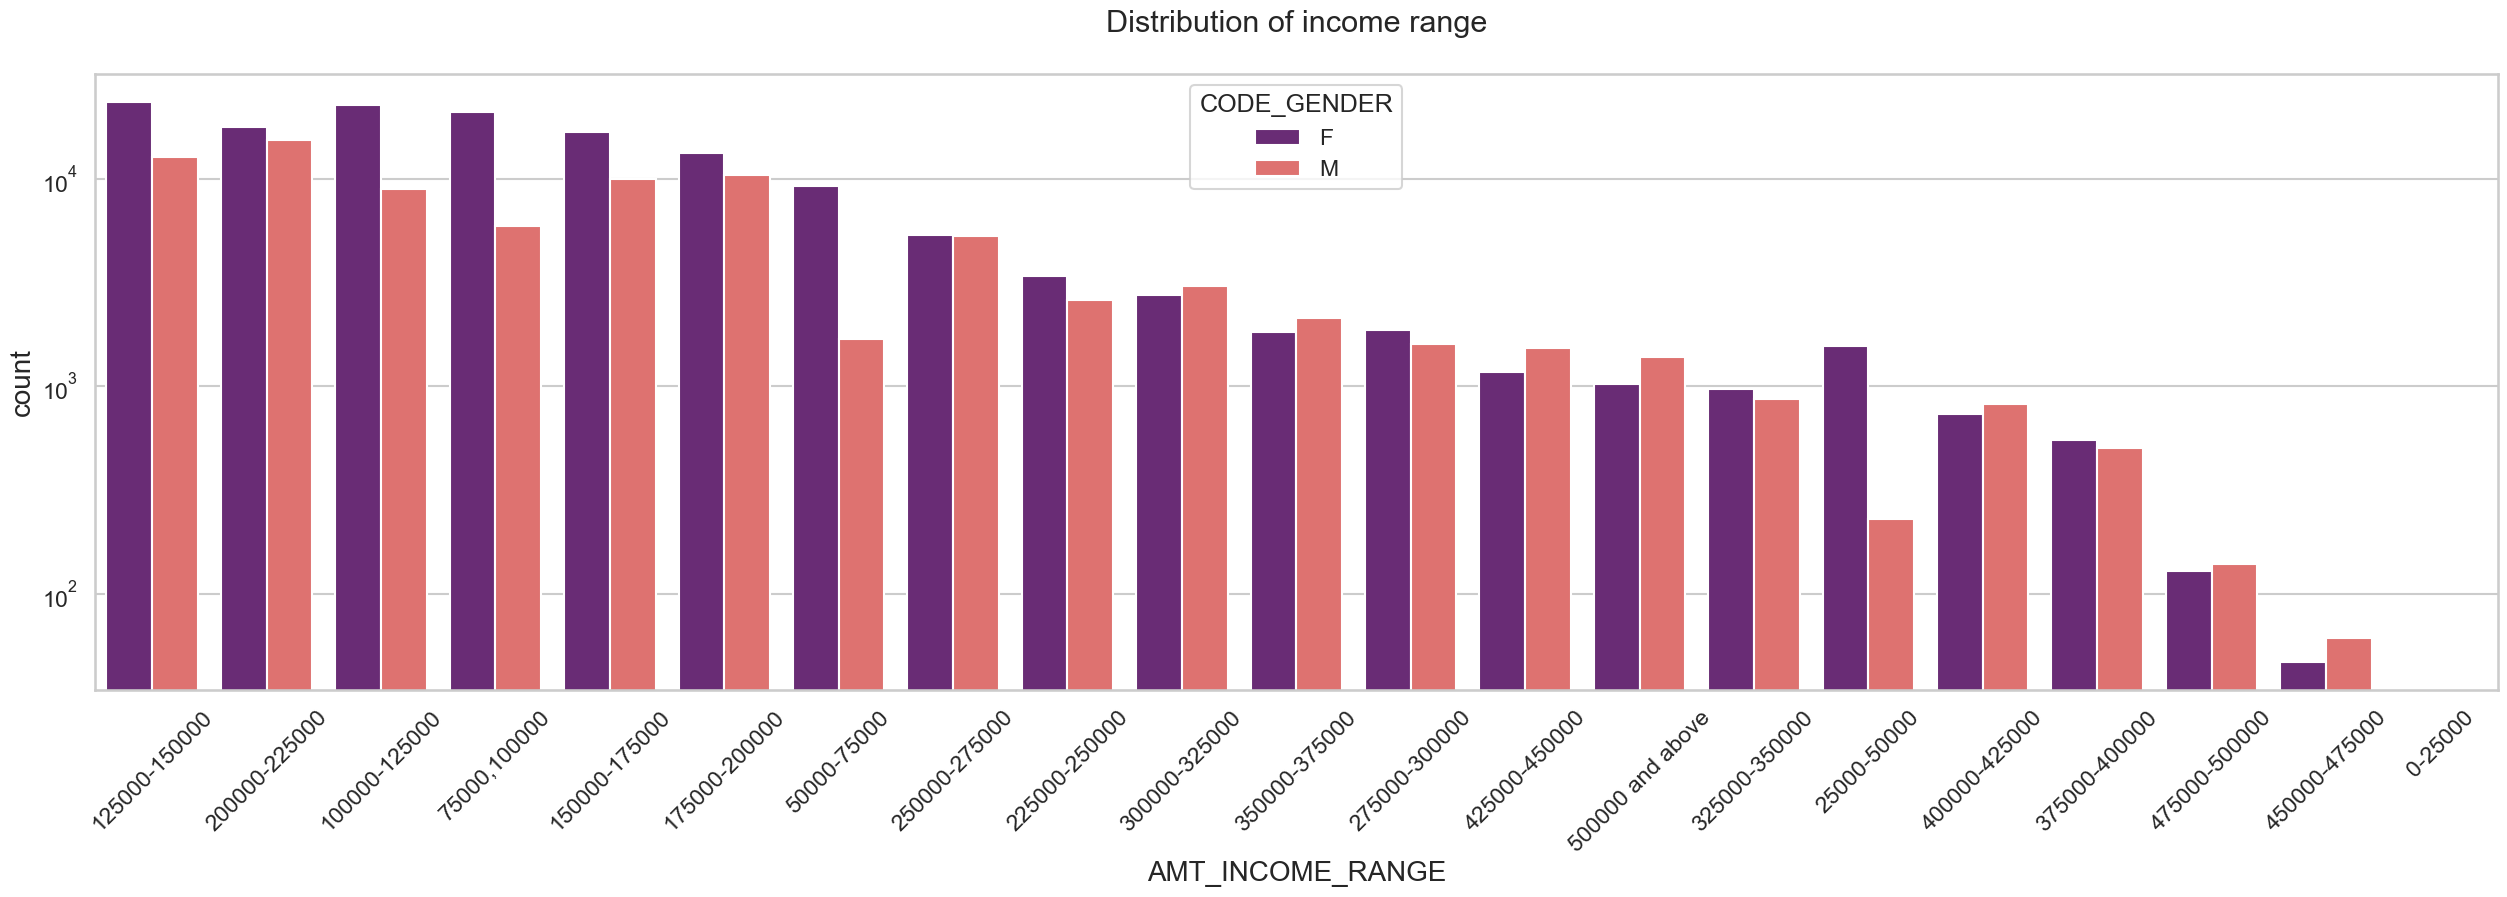

In [78]:
# Plotting for a variety of incomes

uniplot(target0_eda,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


# Concluding remarks based on the graph above.

1.**More women than men are counted.**

2.**There are additional credits available for incomes between 100,000 and 200,000.**

3.**According to this graph, women have more credit for that range than men do.**

4.**For income levels of 400000 and beyond, very few count.**




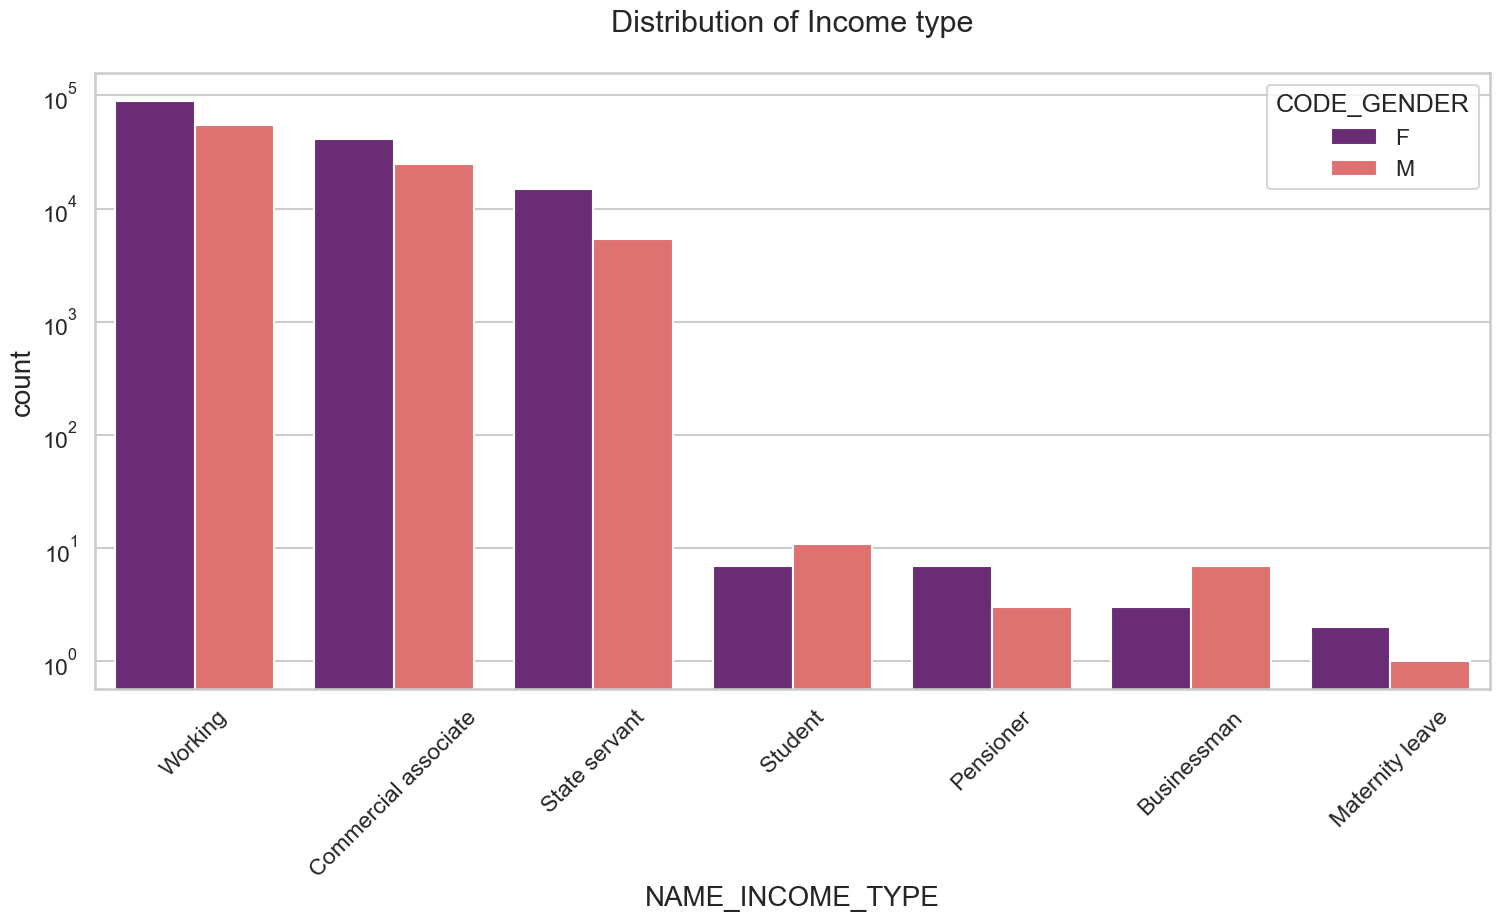

In [79]:
# Income_Type

uniplot(target0_eda,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Based on the information provided in the graph:

1. The number of credits is larger for income types "working," "commercial associate," and "state servant."

2. Fewer credits are available for the income types "student," "pensioner," "businessman," and "maternity leave."

3. Due to this, females have more credits than males.

    

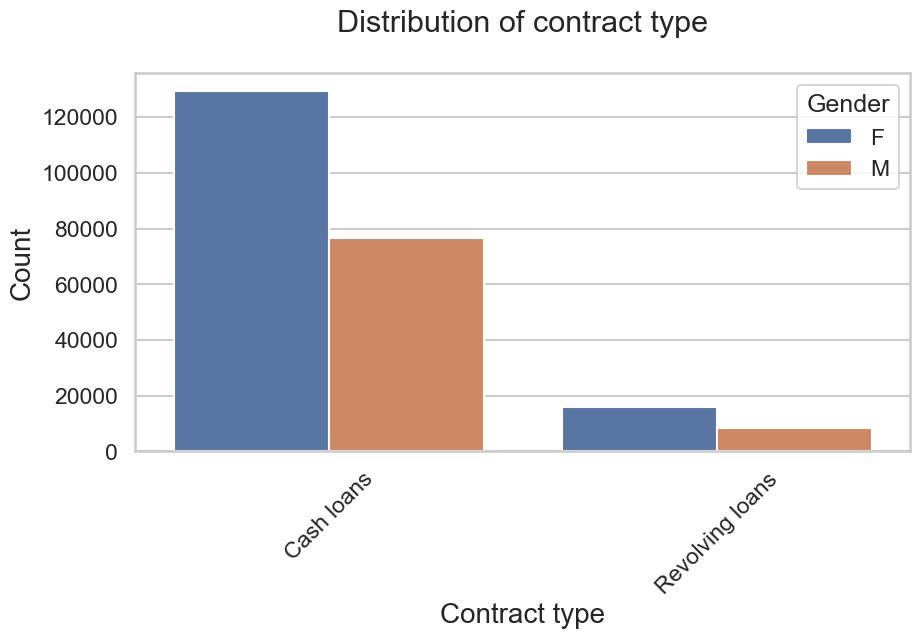

In [80]:
# Plotting based on Contract type

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import countplot

# Load the data
df = target0_eda

# Create a countplot of the contract type, colored by gender
plt.figure(figsize=(10, 6))
ax = countplot(
    x = "NAME_CONTRACT_TYPE",
    hue = "CODE_GENDER",
    data = df,
)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.title("Distribution of contract type")
plt.subplots_adjust(bottom=0.25)

# Change the format of the plot
ax.set_ylabel("Count")
ax.set_xlabel("Contract type")
ax.legend(title="Gender")
plt.show()



Based on the information depicted in the graph:

1. Cash loans, as a contract type, exhibit a higher number of credits compared to revolving loans.

2. Additionally, it is evident from the graph that women tend to dominate in credit applications within this particular context.

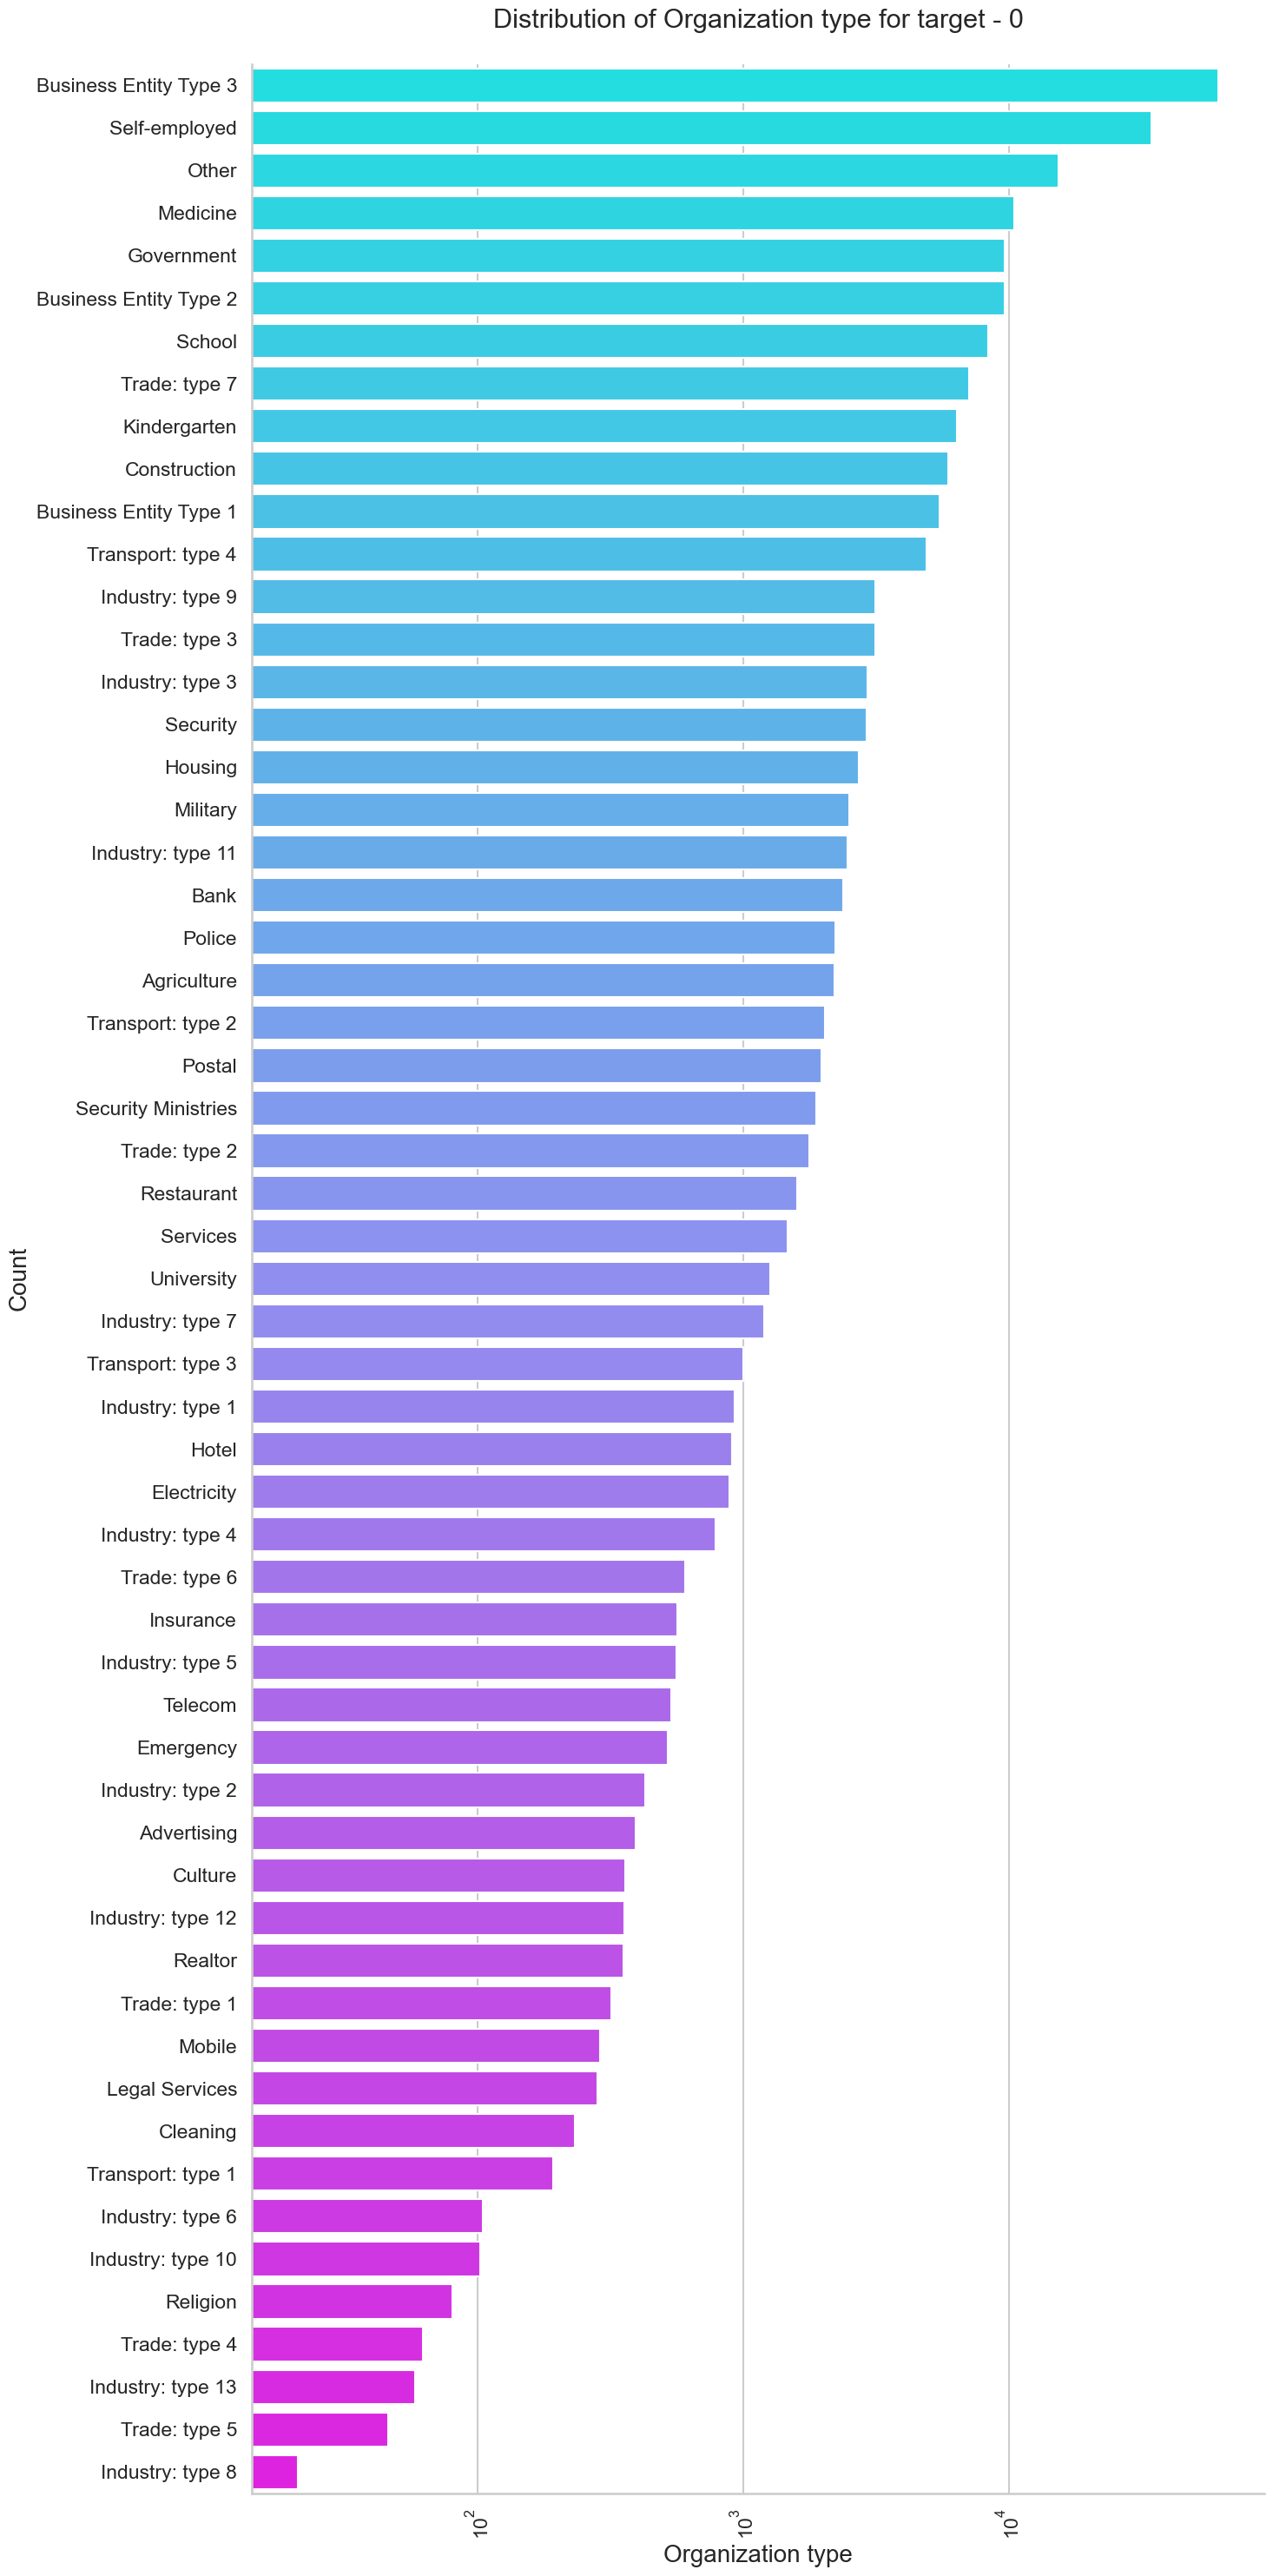

In [81]:
# Using a logarithmic scale when plotting for Organization type

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Create a figure
plt.figure(figsize=(15, 30))

# Set the font sizes
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Set the title
plt.title("Distribution of Organization type for target - 0")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Set the x-axis to log scale
plt.xscale('log')

# Create a count plot
sns.countplot(
    data=target0_eda,
    y='ORGANIZATION_TYPE',
    order=target0_eda['ORGANIZATION_TYPE'].value_counts().index,
    palette='cool',
)

# Change the format of the plot
sns.despine()  # Remove top and right spines
plt.xlabel("Organization type")
plt.ylabel("Count")
plt.tight_layout()

# Show the plot
plt.show()



Based on the information depicted in the graph:

1. The majority of credit applicants belong to organization types such as "Business entity Type 3," "Self employed," "Other," "Medicine," and "Government."

2. In contrast, there is a comparatively lower number of customers associated with industry types 8, 6, 10, 5, religion and 4 in terms of credit applications.

Currently, categorical univariate analysis on a logarithmic scale is being performed for target=1 (customer experiencing payment troubles).

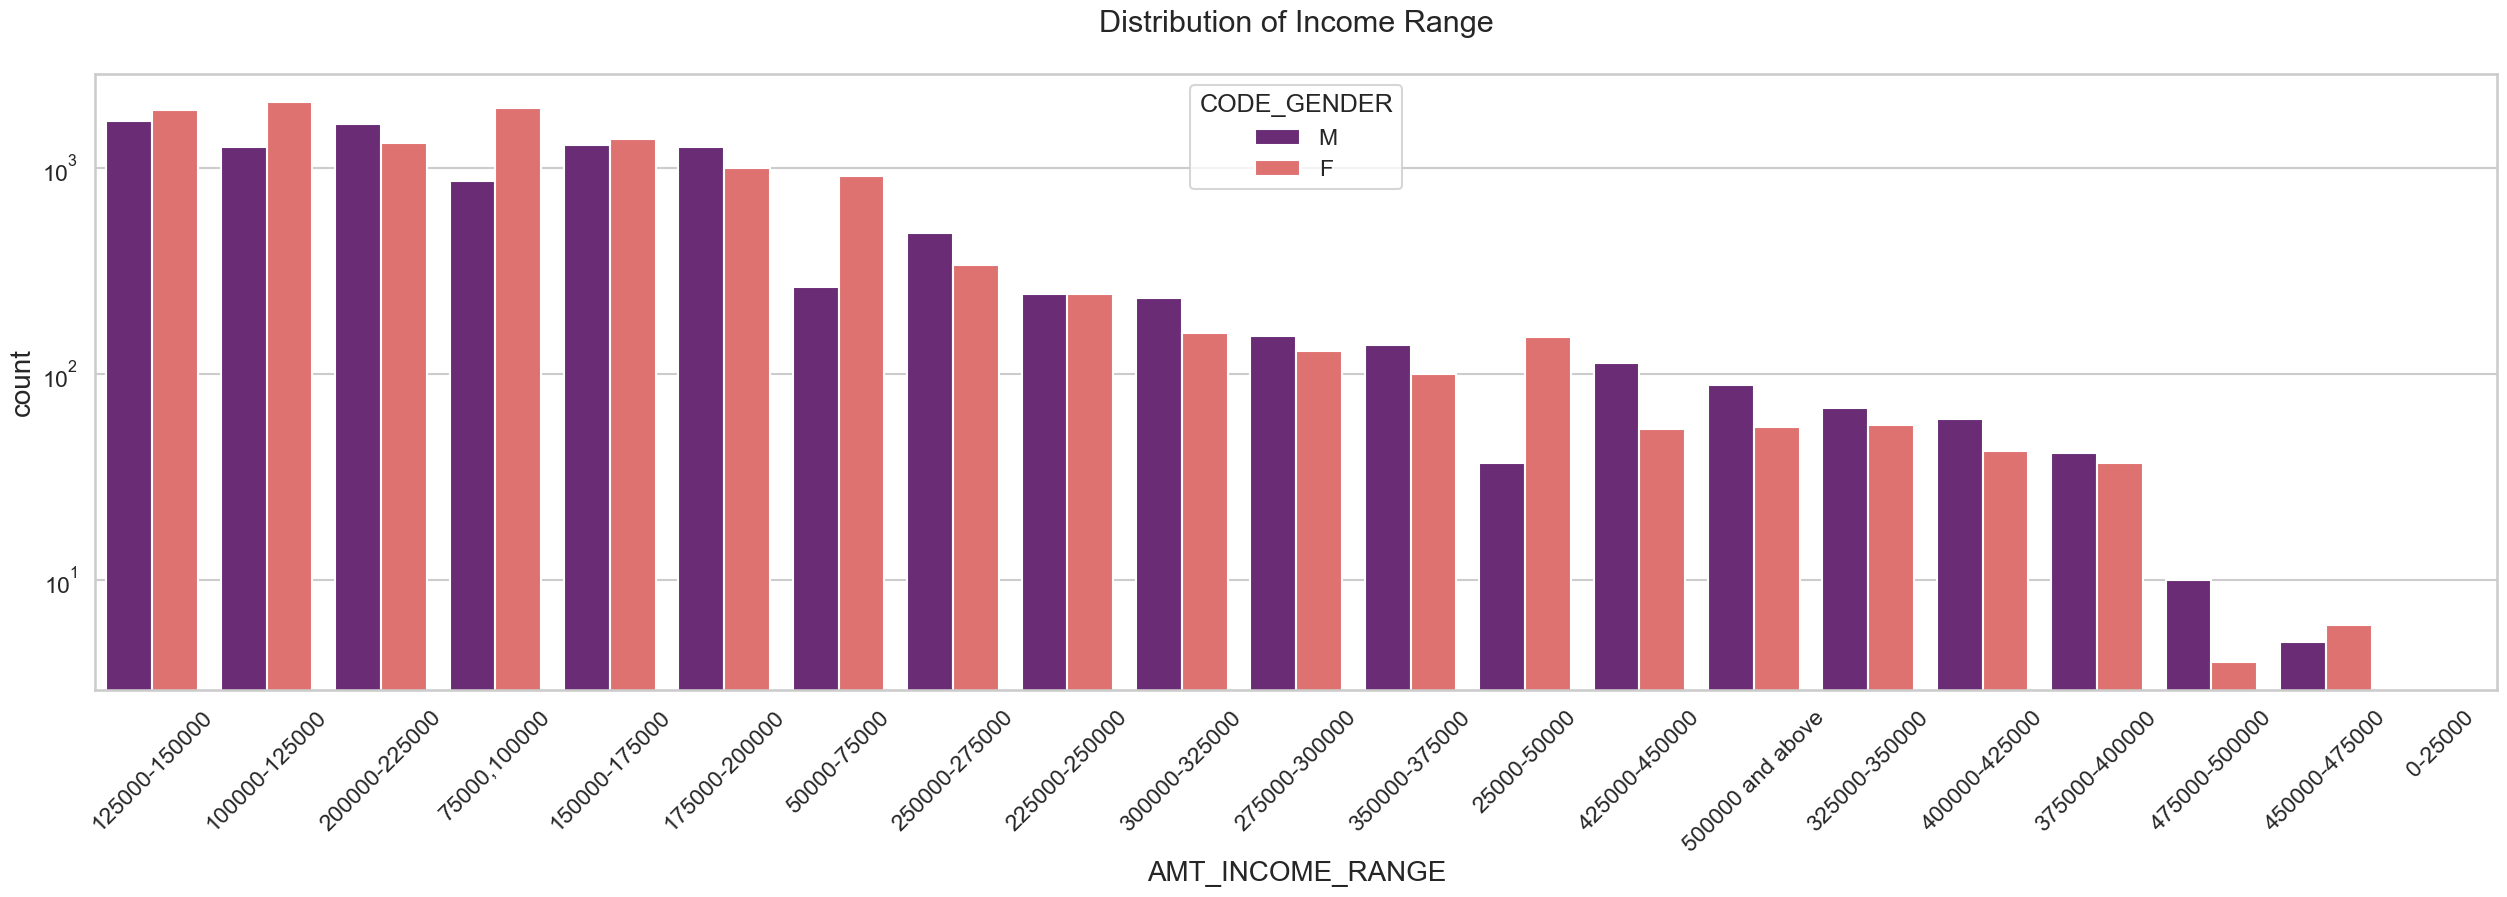

In [82]:
# PLotting for income range

uniplot(target1_eda, col='AMT_INCOME_RANGE', title='Distribution of Income Range', hue='CODE_GENDER')

Based on the information depicted in the graph:

1. Male numbers outnumber female counts.(13/20)

2. There are additional credits available for incomes between 100,000 and 200,000.

3. This graph demonstrates that men have more credits in that range than women do.

4. For income levels of 400,000 and beyond, very few count.

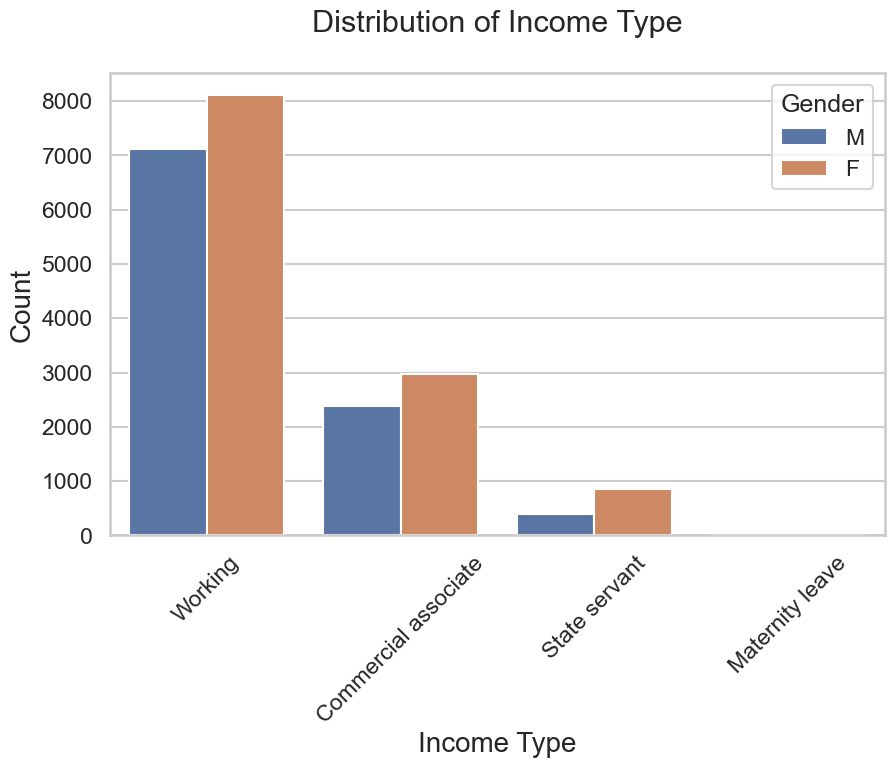

In [83]:
# Plotting for Income type

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'target1_eda' is your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(
    x='NAME_INCOME_TYPE',
    hue='CODE_GENDER',
    data=target1_eda
)
plt.title('Distribution of Income Type')
plt.xticks(rotation=45)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


Based on the information depicted in the graph:

1. Income types such as "Working," "Business associate," and "State employee" have a notably higher number of credits compared to other income types, such as "Maternity leave."

2. The graph suggests that, due to the larger number of credits associated with these income types, women tend to have more credits than men in these categories.

3. Conversely, the "Maternity leave" income category exhibits fewer credits in comparison to other income types.

4. Notably, there are no instances of late payments (type 1) associated with income types "Student," "Pensioner," and "Businessman," indicating a positive payment behavior within these categories.

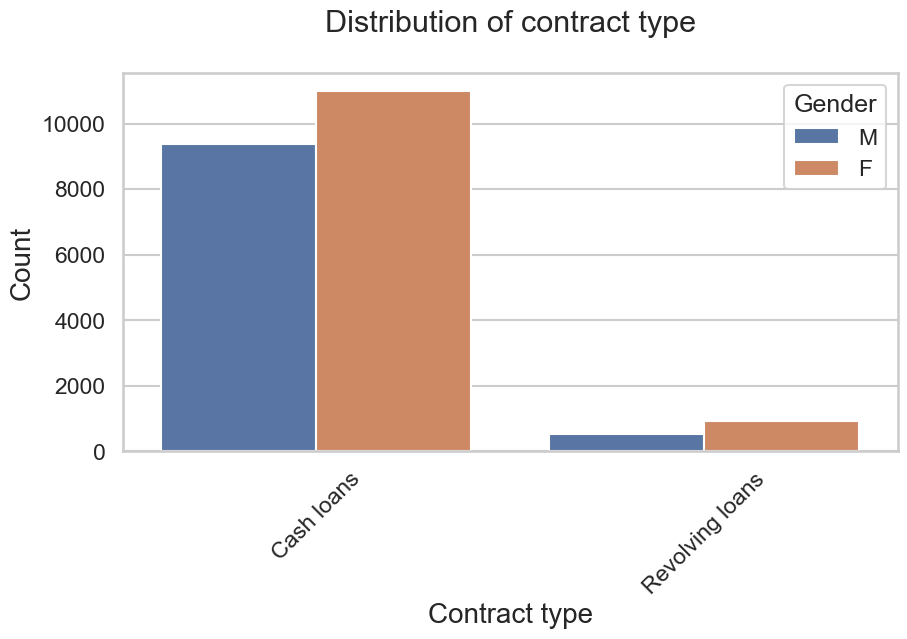

In [84]:
# Plotting for Contract type

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import countplot

# Load the data
inc = target1_eda

# Create a countplot of the contract type, colored by gender
plt.figure(figsize=(10, 6))
ax = countplot(
    x = "NAME_CONTRACT_TYPE",
    hue = "CODE_GENDER",
    data = inc,
)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.title("Distribution of contract type")
plt.subplots_adjust(bottom=0.25)

# Change the format of the plot
ax.set_ylabel("Count")
ax.set_xlabel("Contract type")
ax.legend(title="Gender")

# Add a legend
plt.legend(title="Gender", loc="upper right")

# Show the plot
plt.show()



Based on the information presented in the graph:

1. Cash loans, as a contract type, clearly have a higher number of credits compared to revolving loans.

2. The graph suggests that there is a greater likelihood of women seeking credit as compared to men.

3. In the context of type 1 loans, there appear to be only female applicants for revolving loans, indicating a gender-specific pattern in this loan category.

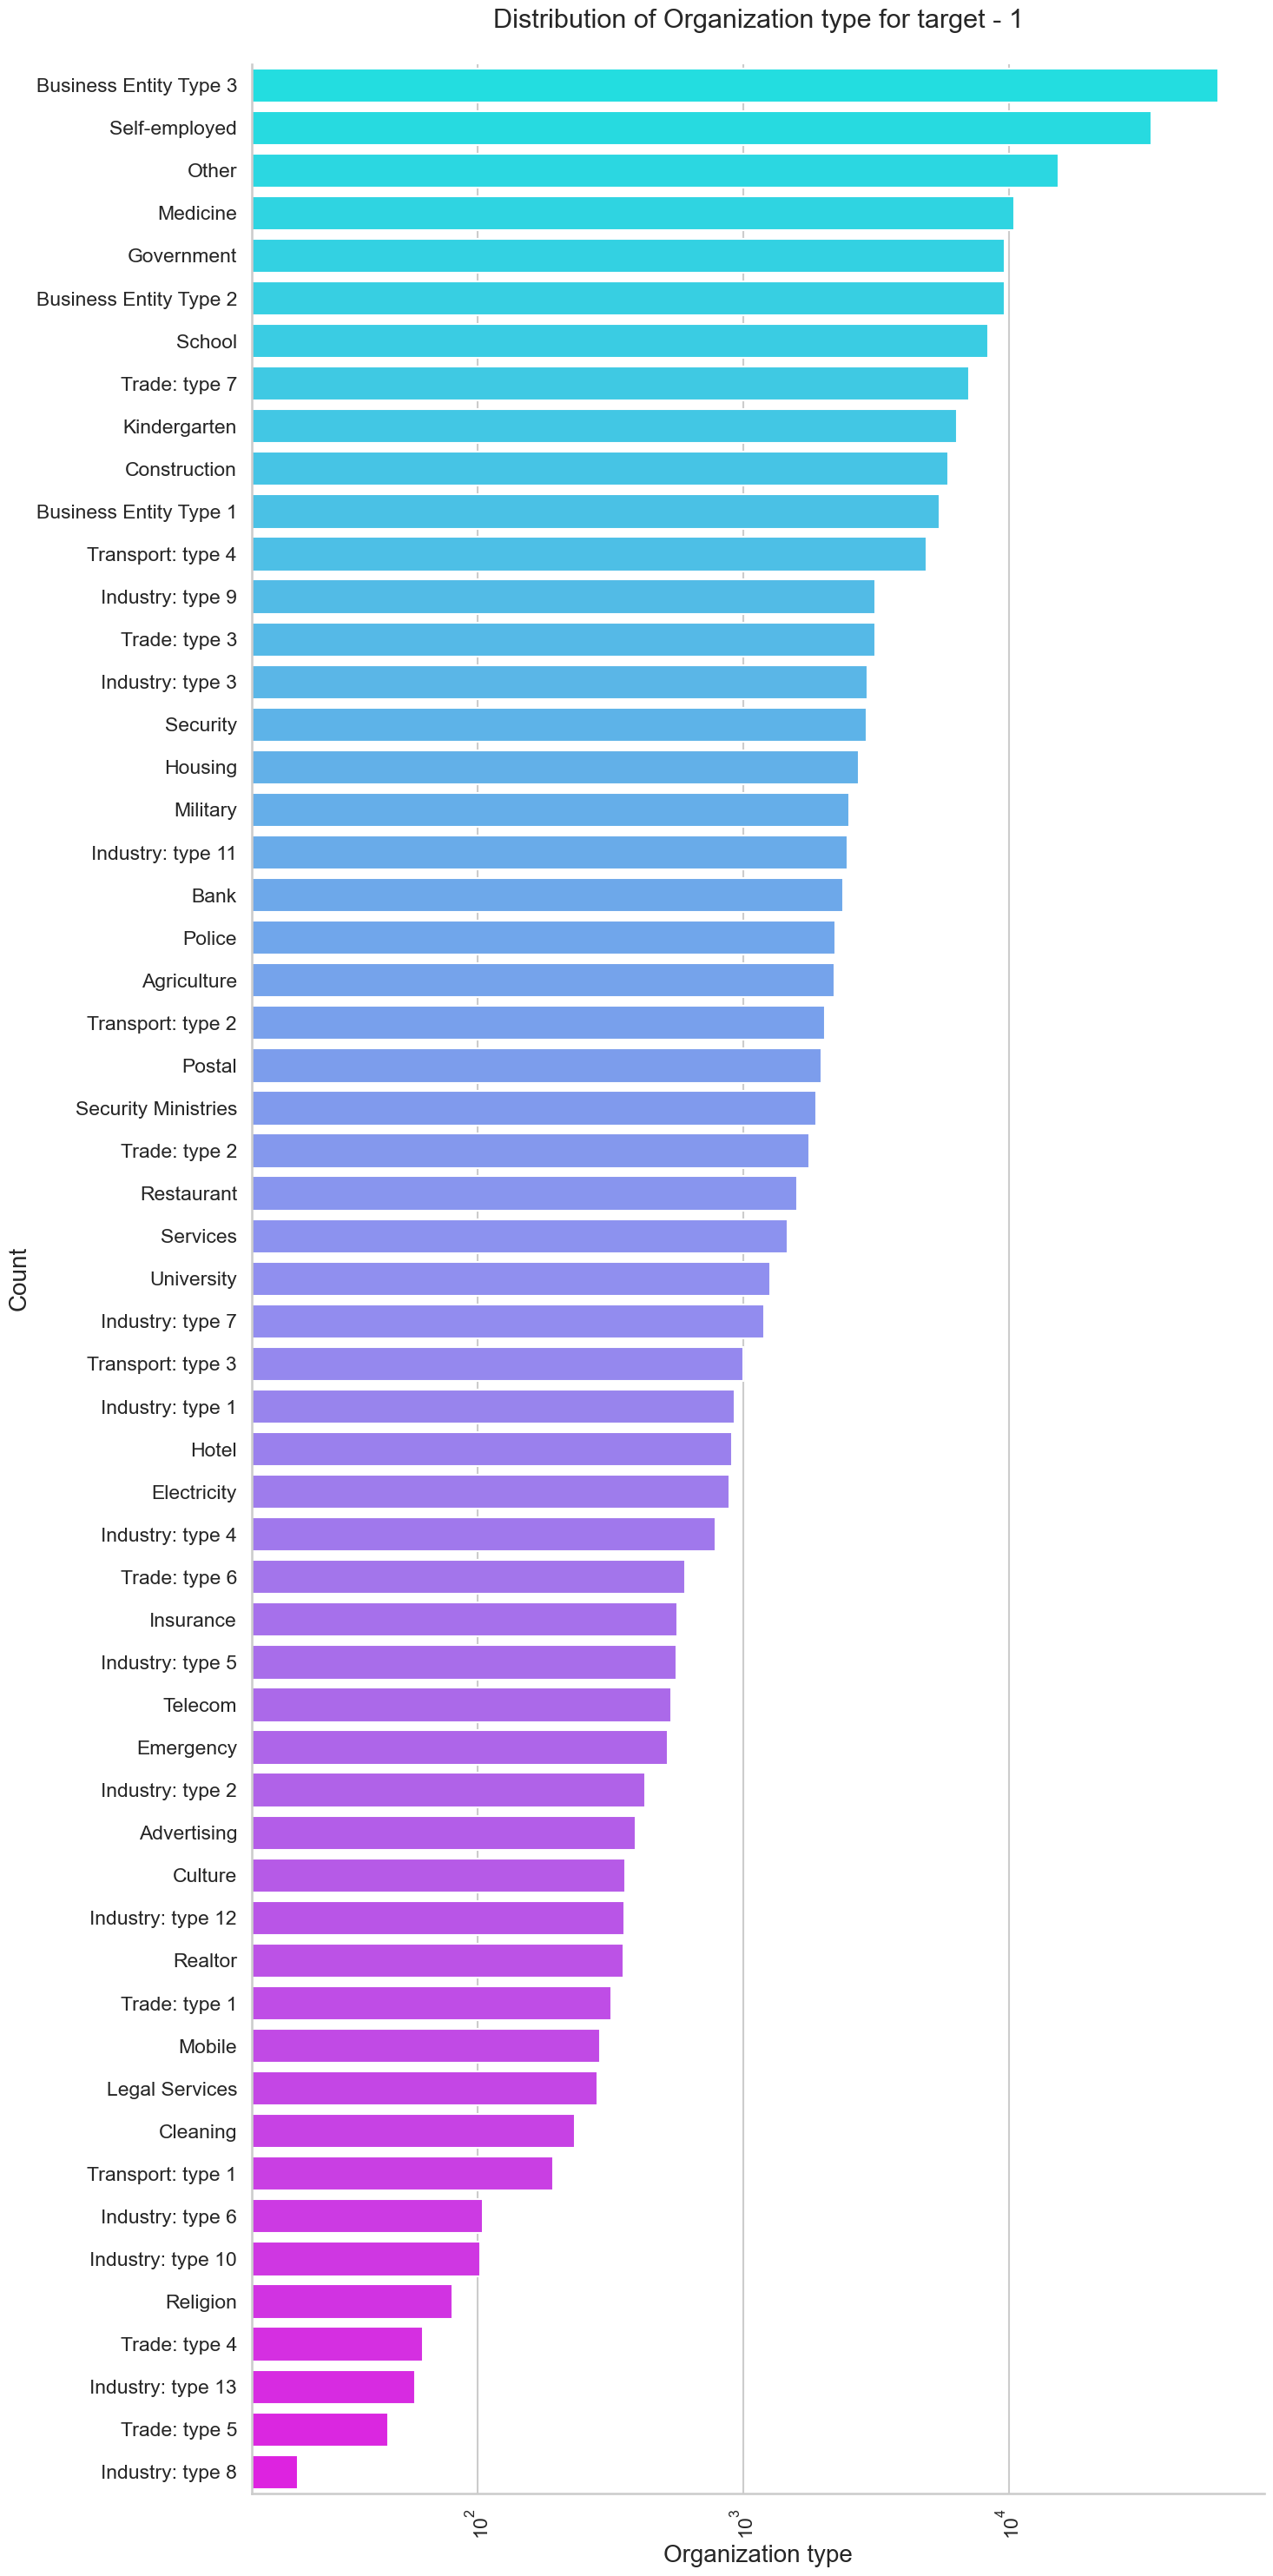

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Create a figure
plt.figure(figsize=(15, 30))

# Set the font sizes
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Set the title
plt.title("Distribution of Organization type for target - 1")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Set the x-axis to log scale
plt.xscale('log')

# Create a count plot
sns.countplot(
    data=target0_eda,
    y='ORGANIZATION_TYPE',
    order=target0_eda['ORGANIZATION_TYPE'].value_counts().index,
    palette='cool',
)

# Change the format of the plot
sns.despine()  # Remove top and right spines
plt.xlabel("Organization type")
plt.ylabel("Count")
plt.tight_layout()

# Show the plot
plt.show()



Based on the information presented in the rotated graph:

1. The majority of credit applicants belong to organization types such as "Business entity Type 3," "Self employed," "Other," "Medicine," and "Government."

2. In contrast, there are fewer customers associated with trade types 5, 4, and 8, industry type 6, and the religion category in terms of credit applications.

3. The distribution of organization types appears to be consistent with type 0, indicating a similar pattern across both types.

In [86]:
import pandas as pd
import scipy.stats as stats

# Assuming you have two dataframes: target0_corr and target1_corr
target0_corr = target0_eda.iloc[:, 2:]
target1_corr = target1_eda.iloc[:, 2:]

# Calculate Spearman correlation matrix for target 0
alpha = target0_corr.corr(method='spearman')

# Calculate Spearman correlation matrix for target 1
beta = target1_corr.corr(method='spearman')


In [87]:
# Relating to alpha

alpha

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN                     1.000000         -0.021950   -0.023652    -0.010795                   -0.030579    0.266534       0.030948           0.155518        -0.119164                -0.030162                   -0.022813                   -0.015475                    -0.005576                0.002344                0.007487                 0.013295
AMT_INCOME_TOTAL                -0.021950          1.000000    0.403876     0.472204                    0.110074   -0.054666      -0.060868           0.040559        -0.036702                 0.073503                    0.077634                    0.159962                     0.148281               -0.001023               -0.013856                -0.004758
AMT_CREDIT                      -0.023652          0.403876    1.000000     0.826689                    0.060706   -0.169030      -0.104251          -0.015318        -0.038197                 0.036923                    0.015118                    0.041693                     0.045175               -0.040616               -0.037000                -0.011194
AMT_ANNUITY                     -0.010795          0.472204    0.826689     1.000000                    0.064328   -0.100287      -0.074643           0.010712        -0.027354                 0.032953                    0.033435                    0.070841                     0.069051               -0.019954               -0.024085                -0.008087
REGION_POPULATION_RELATIVE      -0.030579          0.110074    0.060706     0.064328                    1.000000   -0.041663       0.000900          -0.042400        -0.010299                 0.133213                   -0.025292                    0.032446                     0.056814               -0.049779               -0.034808                -0.007332
DAYS_BIRTH                       0.266534         -0.054666   -0.169030    -0.100287                   -0.041663    1.000000       0.307787           0.265449         0.083331                 0.051299                    0.058627                    0.038104                     0.012789                0.167477                0.111539                 0.029007
DAYS_EMPLOYED                    0.030948         -0.060868   -0.104251    -0.074643                    0.000900    0.307787       1.000000           0.126708         0.106823                 0.026444                    0.065435                    0.086966                     0.063533                0.118224                0.125954                 0.069567
DAYS_REGISTRATION                0.155518          0.040559   -0.015318     0.010712                   -0.042400    0.265449       0.126708           1.000000         0.036788                -0.029553                    0.017715                    0.015092                     0.007716                0.038064                0.047339                 0.027231
DAYS_ID_PUBLISH                 -0.119164         -0.036702   -0.038197    -0.027354                   -0.010299    0.083331       0.106823           0.036788         1.000000                 0.008538                    0.027302                    0.020823                     0.008525                0.054875                0.033427                 0.001476
HOUR_APPR_PROCESS_START         -0.030162          0.073503    0.036923     0.032953                    0.133213    0.051299       0.026444          -0.029553         0.008538                 1.000000                    0.051744                    0.067352                     0.053813                0.011287               -0.005971                -0.010720
REG_REGION_NOT_LIVE_REGION      -0.022813          0.077634    0.015118     0.03

In [88]:
#Relating to beta

beta

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN                     1.000000         -0.039123    0.000427     0.015133                   -0.029682    0.175025       0.006823           0.110854        -0.091042                -0.040338                   -0.035213                   -0.040853                    -0.027993               -0.016072               -0.005444                 0.009557
AMT_INCOME_TOTAL                -0.039123          1.000000    0.364559     0.428947                    0.058005   -0.103026      -0.053798           0.011378        -0.051113                 0.078779                    0.075615                    0.156374                     0.145982               -0.003813               -0.006241                 0.004230
AMT_CREDIT                       0.000427          0.364559    1.000000     0.812093                    0.043545   -0.200718      -0.107605          -0.021973        -0.065143                 0.024616                    0.015043                    0.032536                     0.034861               -0.030974               -0.032882                -0.012465
AMT_ANNUITY                      0.015133          0.428947    0.812093     1.000000                    0.028666   -0.100200      -0.060193           0.019762        -0.044128                 0.021129                    0.029646                    0.060363                     0.059724               -0.011744               -0.015938                -0.003012
REGION_POPULATION_RELATIVE      -0.029682          0.058005    0.043545     0.028666                    1.000000   -0.044444      -0.015246          -0.033490        -0.017779                 0.109400                   -0.032702                   -0.008160                     0.012602               -0.057239               -0.044761                -0.014753
DAYS_BIRTH                       0.175025         -0.103026   -0.200718    -0.100200                   -0.044444    1.000000       0.256870           0.192350         0.146246                 0.041994                    0.046320                    0.022208                     0.000356                0.145884                0.096181                 0.009633
DAYS_EMPLOYED                    0.006823         -0.053798   -0.107605    -0.060193                   -0.015246    0.256870       1.000000           0.086286         0.104244                 0.010328                    0.069566                    0.082264                     0.056081                0.118869                0.139863                 0.069316
DAYS_REGISTRATION                0.110854          0.011378   -0.021973     0.019762                   -0.033490    0.192350       0.086286           1.000000         0.061563                -0.044753                    0.006362                    0.000896                    -0.001416                0.015831                0.039204                 0.026105
DAYS_ID_PUBLISH                 -0.091042         -0.051113   -0.065143    -0.044128                   -0.017779    0.146246       0.104244           0.061563         1.000000                 0.012709                    0.024860                    0.013162                     0.002567                0.048184                0.015838                -0.015598
HOUR_APPR_PROCESS_START         -0.040338          0.078779    0.024616     0.021129                    0.109400    0.041994       0.010328          -0.044753         0.012709                 1.000000                    0.050953                    0.063877                     0.050300                0.003947                0.004775                 0.002319
REG_REGION_NOT_LIVE_REGION      -0.035213          0.075615    0.015043     0.02

In [89]:
#Currently, the best method for visualizing the aforementioned association is by putting it on a heat map.
#alpha
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to create a heatmap for correlation matrices
def plot_corr_heatmap(data, title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

    # Create a heatmap with a color map of choice
    sns.heatmap(data, cmap="RdYlGn", annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

# Plotting Alpha

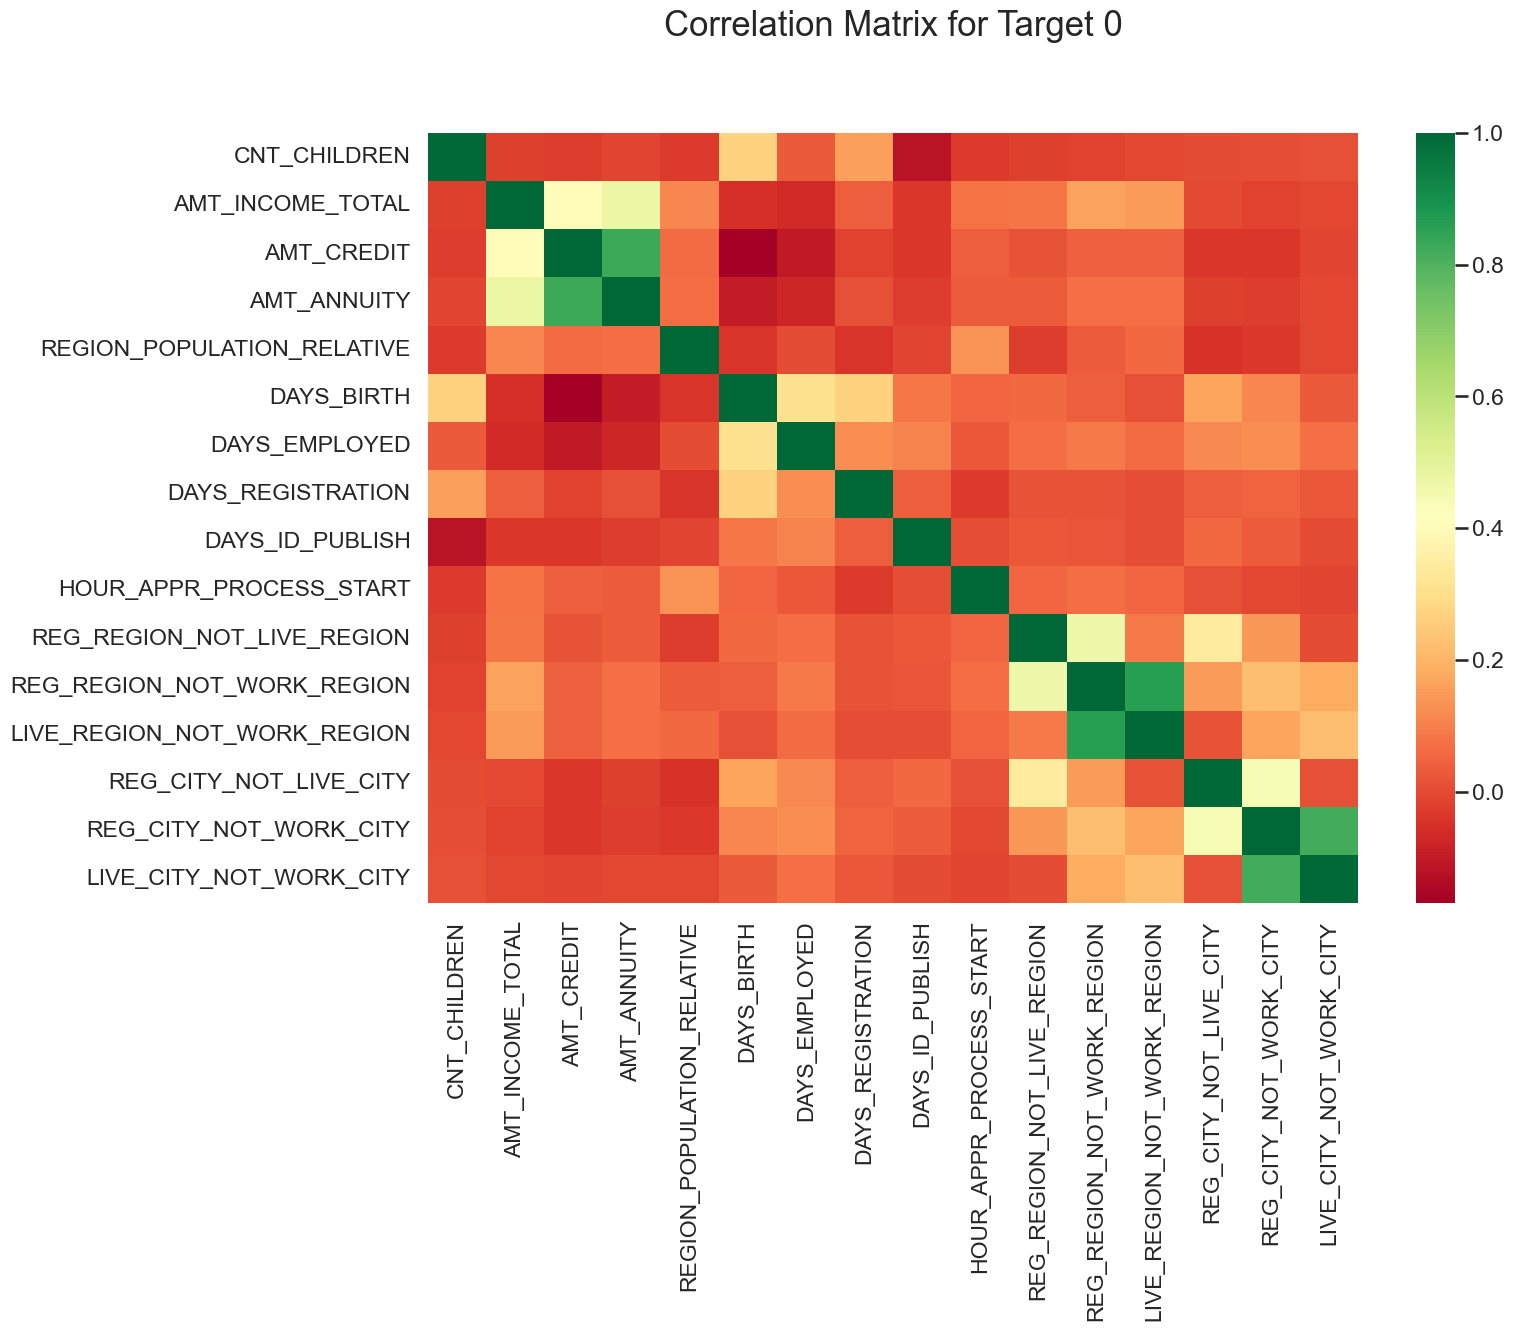

In [90]:
# Call the function to plot the heatmap for alpha
plot_corr_heatmap(alpha, "Correlation Matrix for Target 0")

From the correlation heatmap presented above, several noteworthy observations can be made:

1. **Inverse Relationship Between Credit Amount and Date of Birth:** It is evident that credit amount tends to be higher for clients with a lower age, and conversely lower for older clients.

2. **Inverse Relationship Between Credit Amount and Number of Children:** The data suggests that credit amount is higher for clients with fewer children, while it tends to decrease as the number of children increases.

3. **Inverse Relationship Between Income and Number of Children:** There appears to be an inverse correlation between income and the number of children a client has. Clients with fewer children tend to have higher incomes.

4. **Fewer Children in Densely Populated Areas:** The data indicates that clients with fewer children are more likely to reside in densely populated areas.

5. **Higher Credit Amounts in Densely Populated Areas:** Densely populated areas are associated with higher credit amounts.

6. **Higher Income in Densely Populated Areas:** Clients residing in densely populated areas tend to have higher incomes.



# **Plotting Beta**

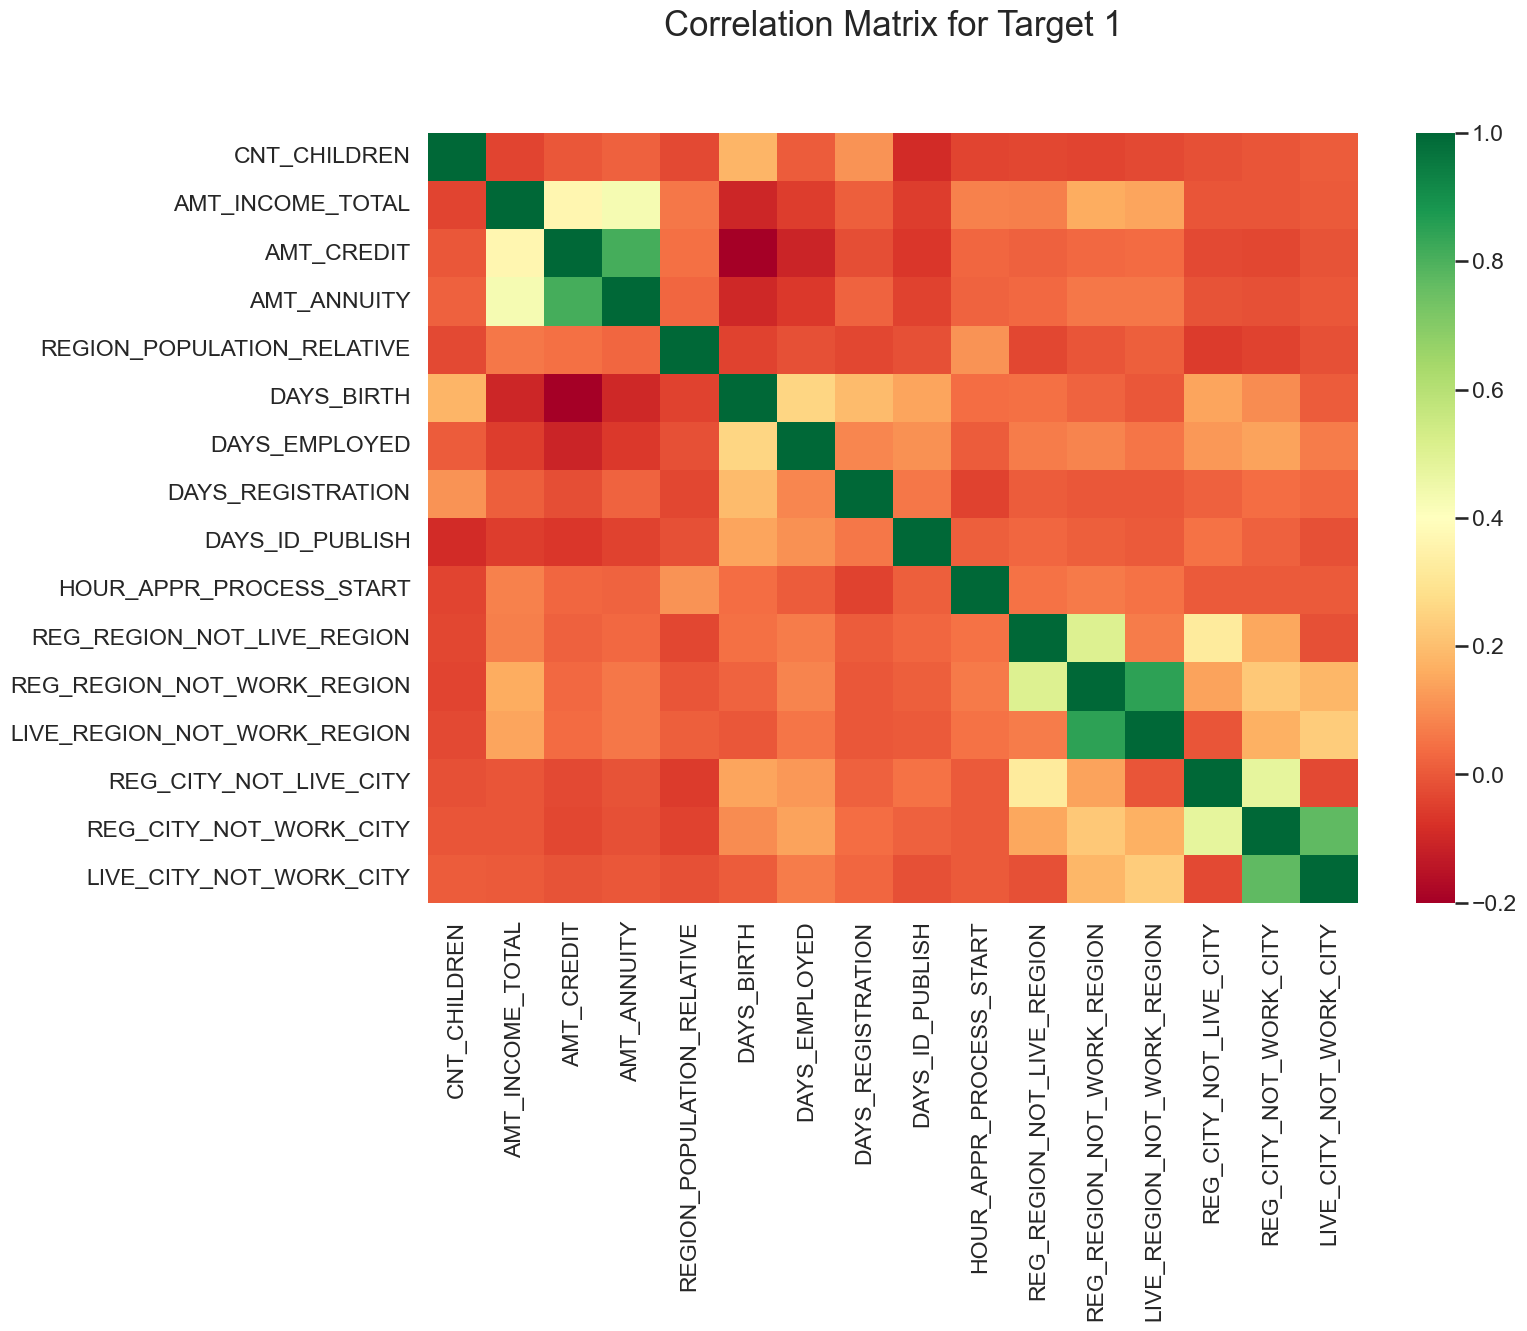

In [91]:
# Call the function to plot the heatmap for beta
plot_corr_heatmap(beta, "Correlation Matrix for Target 1")




**Observations for Beta:**

1. **Permanent Address vs. Contact Address:**
   - Fewer children are born at the client's permanent address compared to their contact address.
   - Conversely, more children are born at the client's contact address than at their permanent address.

2. **Permanent Address vs. Work Address:**
   - Fewer children are born to clients whose permanent addresses differ from their work addresses.
   - Conversely, more children are born to clients whose permanent addresses match their work addresses.



# Univariate analysis for variables


In [92]:
import pandas as pd

eda_application_current = pd.read_csv(r"C:\Users\roylu\Downloads\UPGRAD\application_data.csv")
eda_application_current.head()

target0_eda = eda_application_current.loc[eda_application_current["TARGET"] == 0]
target1_eda = eda_application_current.loc[eda_application_current["TARGET"] == 1]


In [93]:
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", message="Attempt to set non-positive ylim on a log-scaled axis will be ignored.")

# Your code for creating the boxplot with a logarithmic scale here


**Target 0 - Identifying any outliers**


In [94]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Box plotting for univariate variables analysis

def univariate_numerical(data, col, title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    sns.boxplot(data=data, x=col, orient='v')  # Use the 'data' parameter to specify the DataFrame
    plt.show()


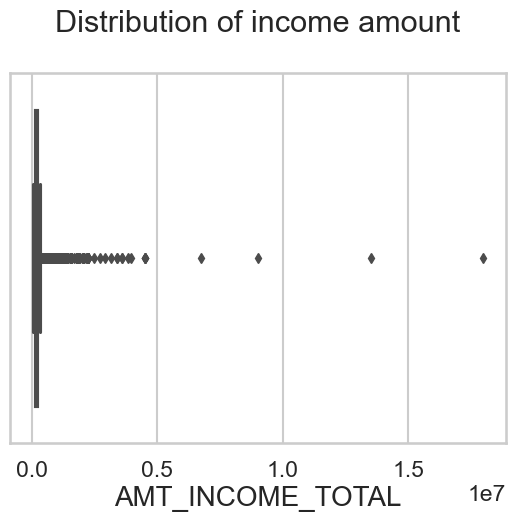

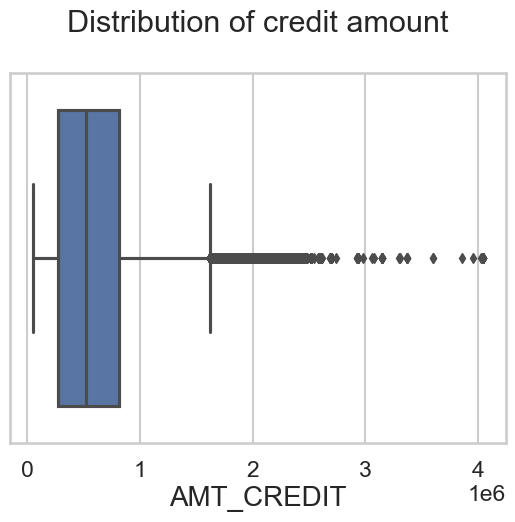

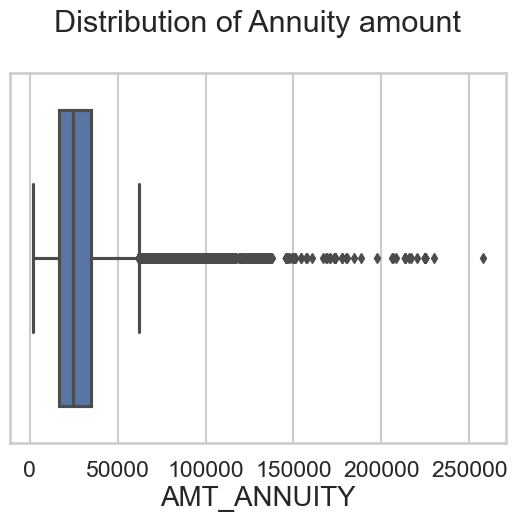

In [95]:
#Income amount
univariate_numerical(data=target0_eda, col='AMT_INCOME_TOTAL', title='Distribution of income amount')
#Credit amount
univariate_numerical(data=target0_eda,col='AMT_CREDIT',title='Distribution of credit amount')
#Annuity amount
univariate_numerical(data=target0_eda,col='AMT_ANNUITY',title='Distribution of Annuity amount')

# Income Amount plot describes:-

1.Some income outliers have been identified.

2.In terms of income, the third quartile is quite low.




# Credit Amount plot describes:-
    
1.Some credit amount anomalies are discovered.

2.For credit amount, the first quartile is greater than the third quartile, indicating that the majority of clients' credits are in the first quartile.




# Annuity Amount plot describes:-

1.There are certain anomalies in annuity amounts.

2.The first quartile has a higher annuity amount than the third quartile, implying that the majority of annuity clients are in the first quartile.

    
    
    

**Target 1 - Identifying any outliers**

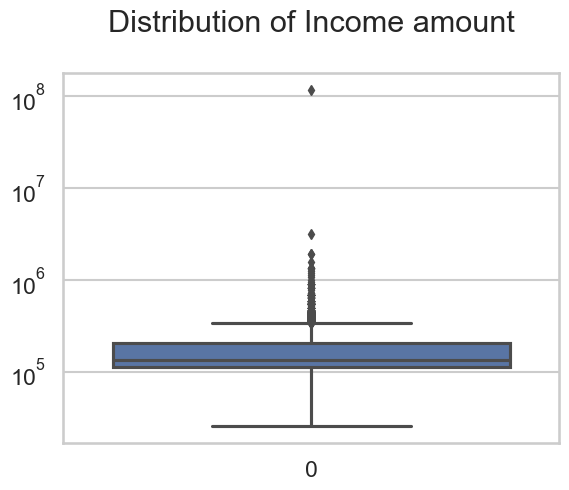

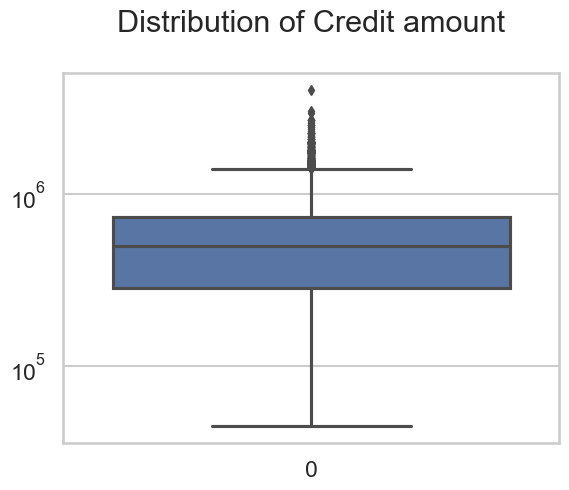

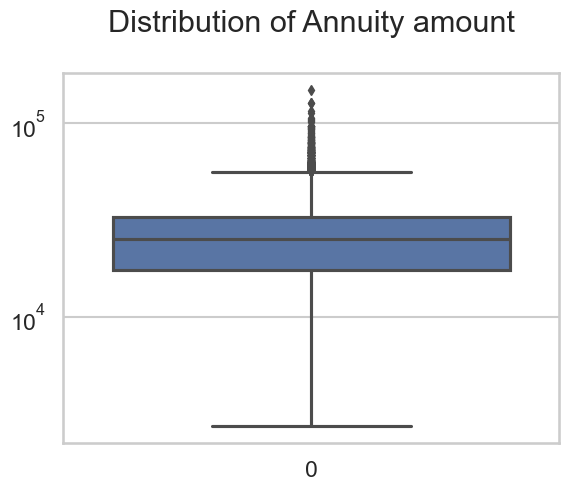

In [96]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for working with numerical data

def univariate_numerical(data, col, title):
    """Creates a univariate boxplot with a logarithmic y-axis.

    Args:
        data: A Pandas DataFrame.
        col: The column name of the variable to plot.
        title: The title of the plot.
    """
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    plt.title(title)

    # Create a copy of the column to avoid modifying the original data
    col_data = data[col].copy()
    # Replace non-positive values with a small positive value
    col_data[col_data <= 0] = 1e-6

    # Set the y-axis scale to logarithmic
    plt.yscale('log')

    sns.boxplot(data=col_data, orient='v')
    plt.show()

#Income amount
univariate_numerical(data=target1_eda, col='AMT_INCOME_TOTAL', title='Distribution of Income amount')
#Credit amount
univariate_numerical(data=target1_eda,col='AMT_CREDIT',title='Distribution of Credit amount')
#Annuity amount
univariate_numerical(data=target1_eda,col='AMT_ANNUITY',title='Distribution of Annuity amount')

# Income Amount

1.Income amounts have some outliers.

2.In terms of income, the third quartile is quite little.

3.The majority of the income clientele are in the first quartile.


# Credit Income

1.Some credit amount anomalies are discovered.

2.For credit amount, the first quartile is greater than the third quartile, indicating that the majority of clients' credits are in the first quartile.


# Annuity Income

1.Some outliers are noticed in annuity amount.

2.The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.



**Bivariate analysis for numerical variables**

**For Target 0**

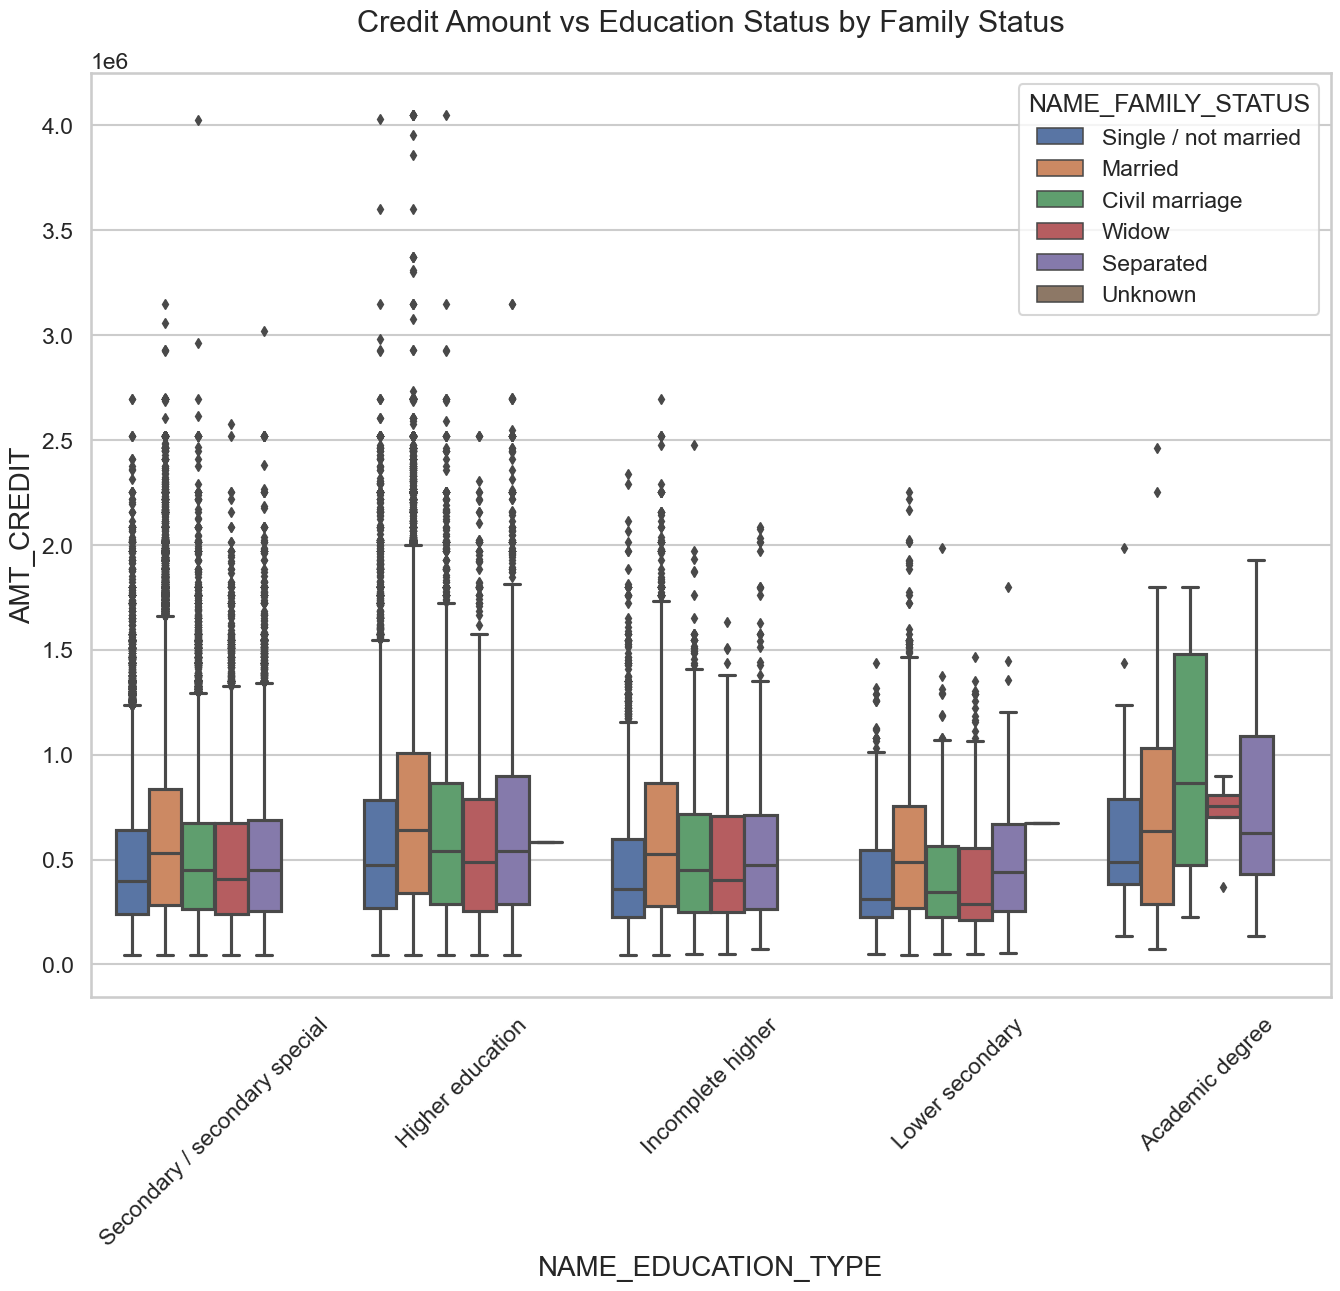

In [97]:
#Box plot for Credit Amount vs Education Status

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
target0_eda = pd.read_csv(r"C:\Users\roylu\Downloads\UPGRAD\application_data.csv")

# Plot the boxplot
plt.figure(figsize=(16, 12))
plt.xticks(rotation=45)
sns.boxplot(
    data=target0_eda,
    x='NAME_EDUCATION_TYPE',
    y='AMT_CREDIT',
    hue='NAME_FAMILY_STATUS',
    orient='v'
)
plt.title('Credit Amount vs Education Status by Family Status')
plt.show()



**OUTLINE**


According to the above box plot, family statuses of 'civil marriage,''marriage,' and'separated' of academic degree education have a larger number of credits than others. Furthermore, greater education of family status of'marriage,''single,' and 'civil marriage' has more outliers. Civil marriage for Academic degree has the majority of credits in the third quartile.

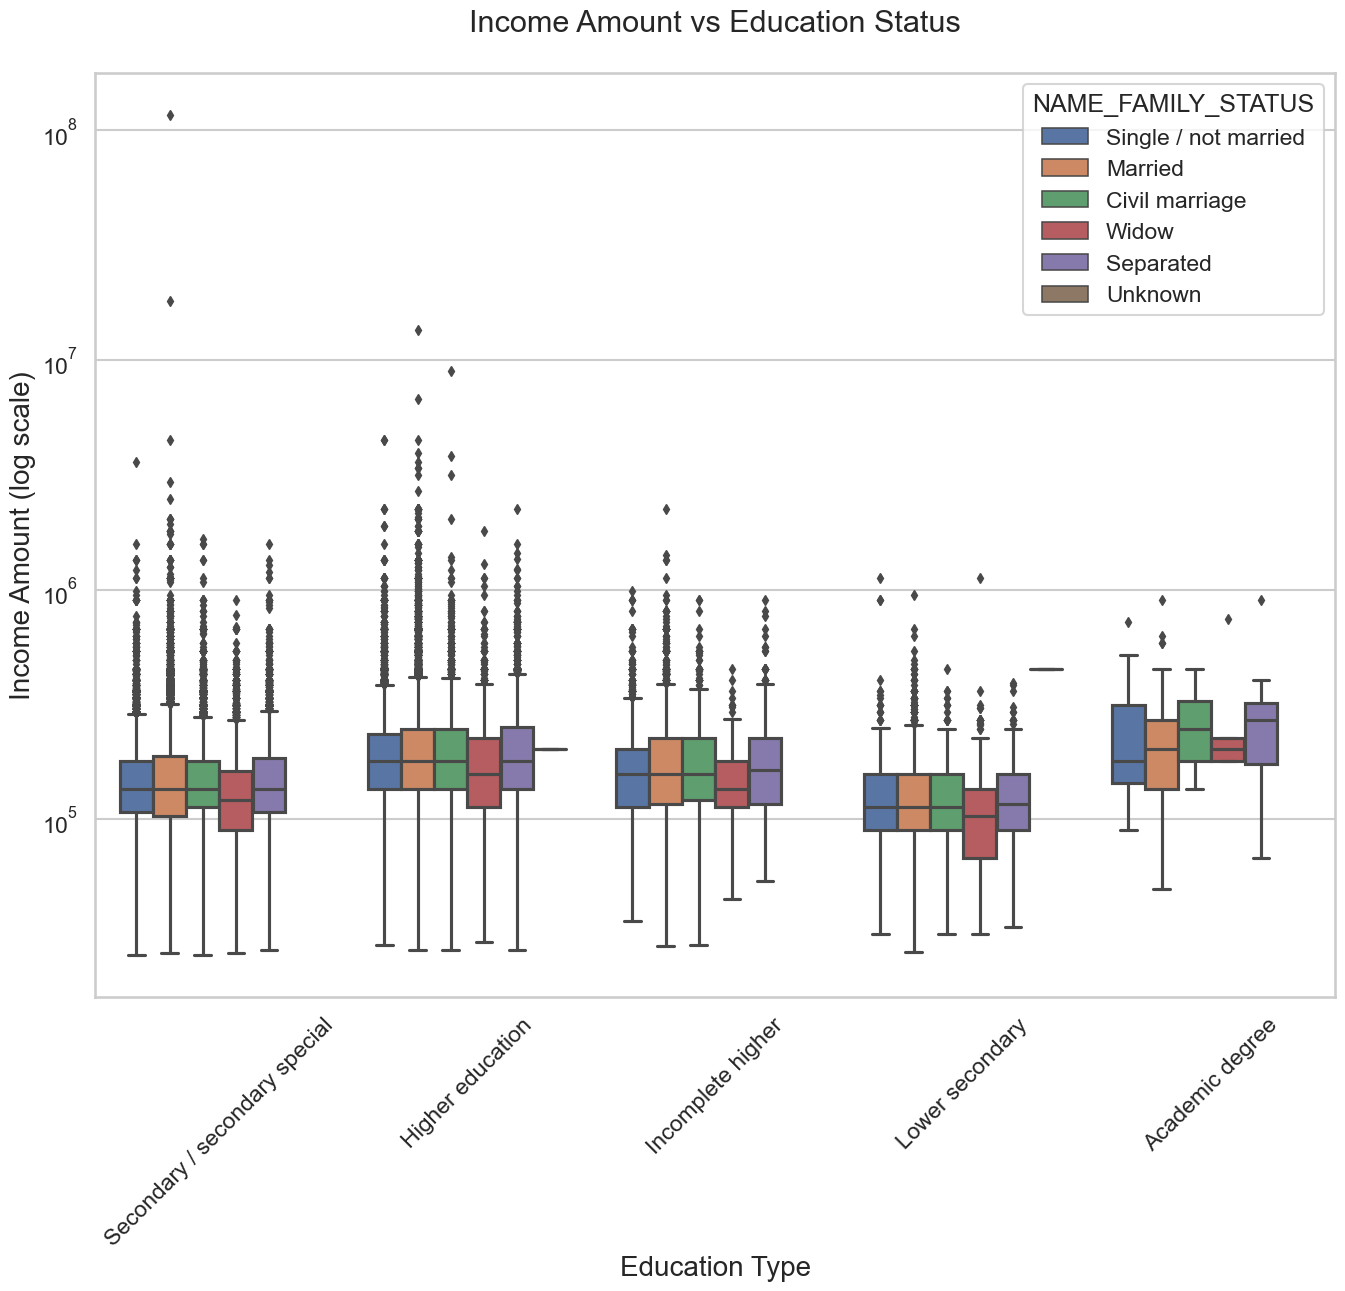

In [98]:
# Box plot for Income amount vs Education Status

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
plt.xticks(rotation=45)

# Set the y-axis scale to logarithmic
plt.yscale('log')

# Create the boxplot
sns.boxplot(data=target0_eda, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS', orient='v')

# Set title and labels
plt.title('Income Amount vs Education Status')
plt.xlabel('Education Type')
plt.ylabel('Income Amount (log scale)')

# Show the plot
plt.show()



**OUTLINE**

Based on the above boxplot, the income amount for Education type 'Higher education' is basically equivalent with family status. It does have a lot of outliers. Academic degrees are less outlier, but their compensation is slightly greater than higher education. Lower secondary civil marriage family status has lower income than others.

**For Target 1** 

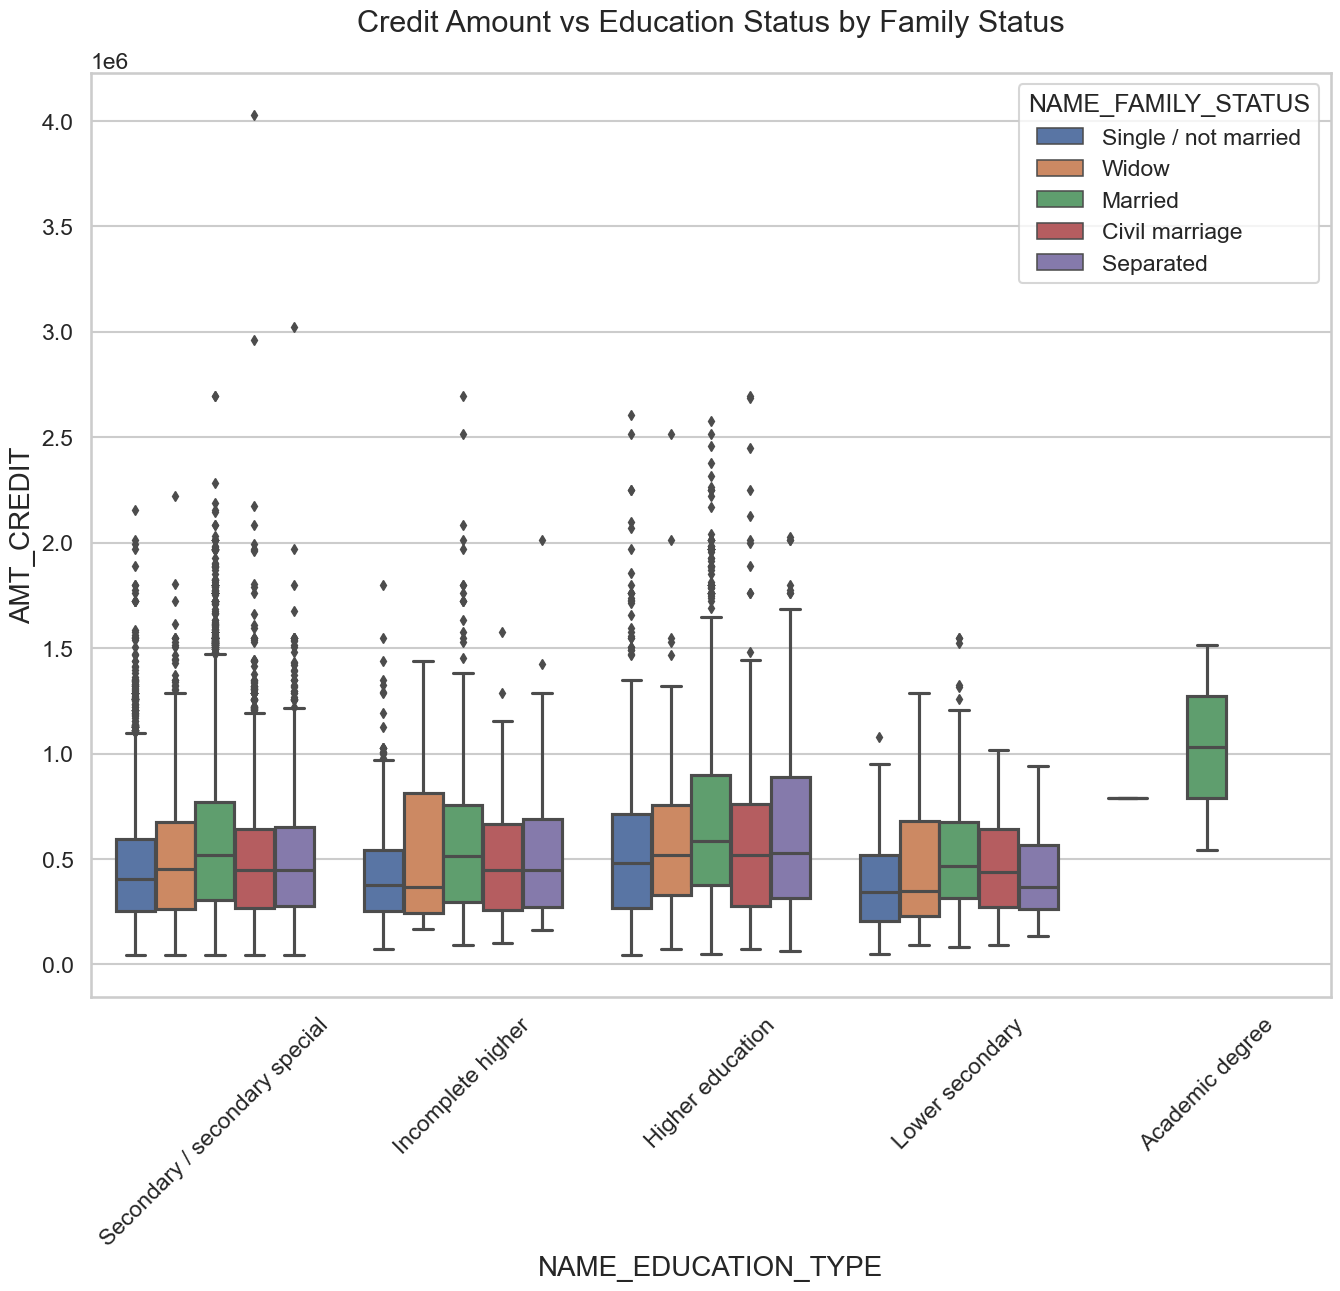

In [99]:
#Box plot for Credit Amount vs Education Status

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
target0_eda = pd.read_csv(r"C:\Users\roylu\Downloads\UPGRAD\application_data.csv")

# Plot the boxplot
plt.figure(figsize=(16, 12))
plt.xticks(rotation=45)
sns.boxplot(
    data=target1_eda,
    x='NAME_EDUCATION_TYPE',
    y='AMT_CREDIT',
    hue='NAME_FAMILY_STATUS',
    orient='v'
)
plt.title('Credit Amount vs Education Status by Family Status')
plt.show()


**OUTLINE**


Identical to Target 0. According to the above box plot, family statuses of 'civil marriage,''marriage,' and'separated' of academic degree education have a larger number of credits than others. The majority of the outliers are from the Education types 'Higher education' and 'Secondary'. Civil marriage for Academic degree has the majority of credits in the third quartile.

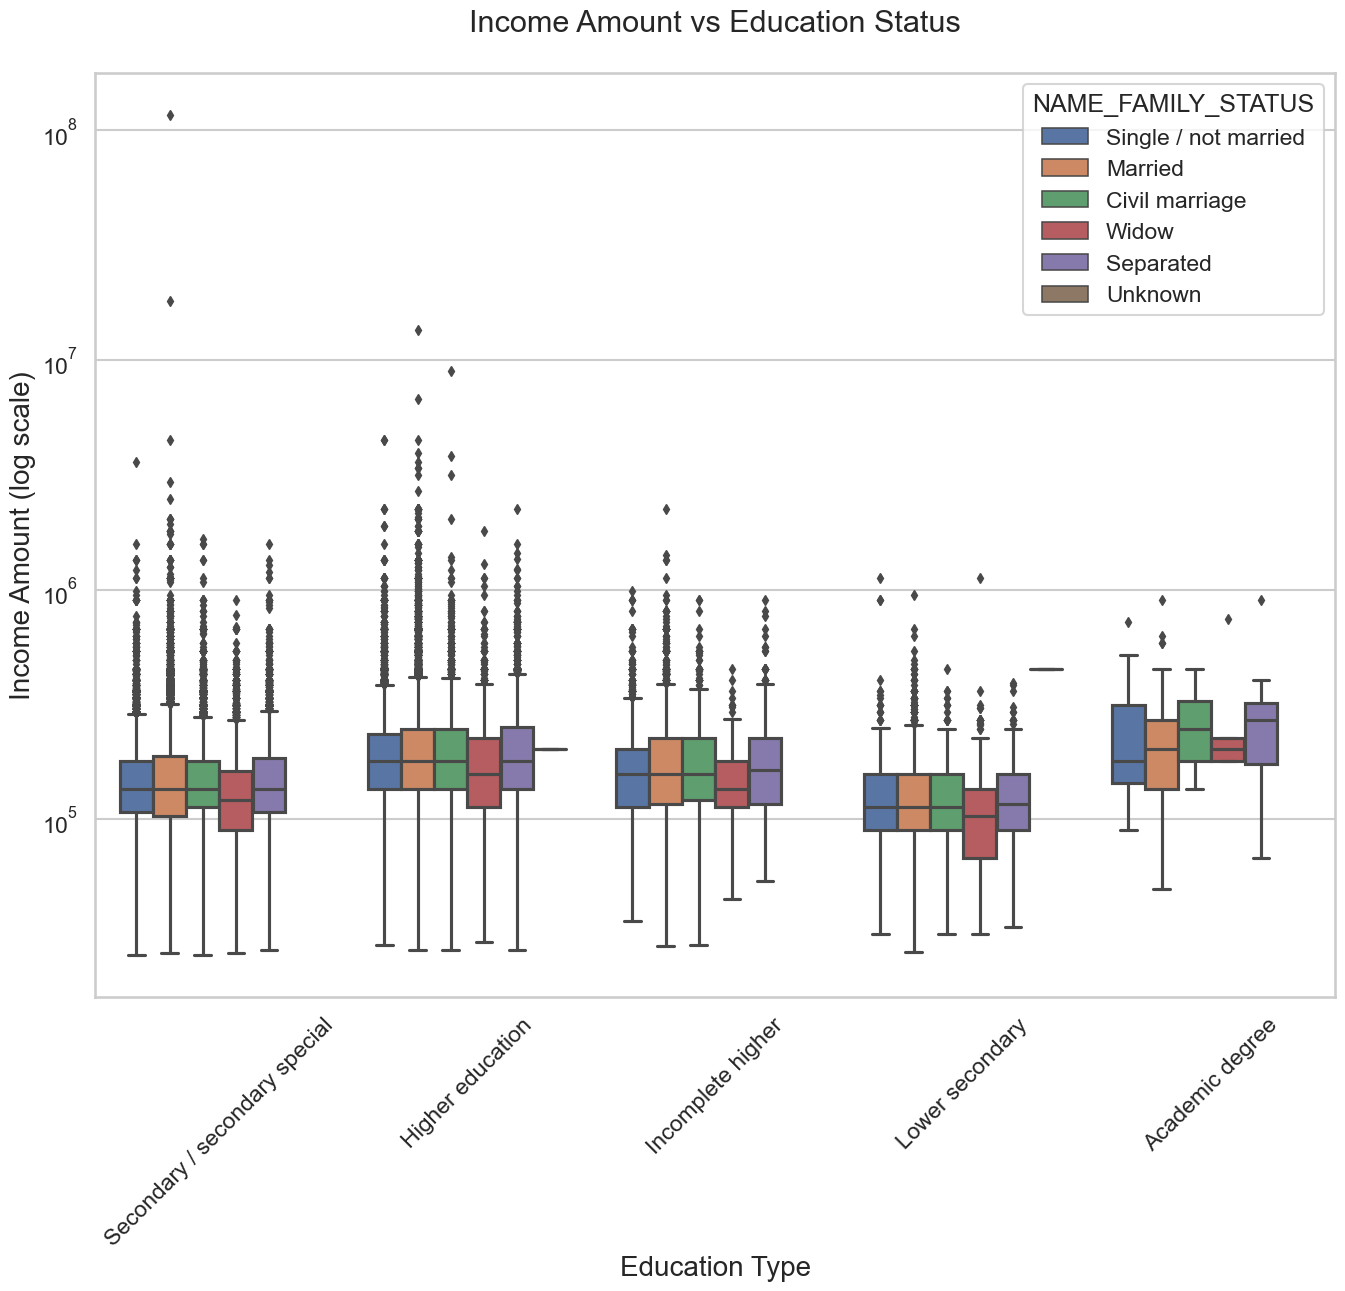

In [100]:
# Box plot for Income amount vs Education Status

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
plt.xticks(rotation=45)

# Set the y-axis scale to logarithmic
plt.yscale('log')

# Create the boxplot
sns.boxplot(data=target0_eda, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS', orient='v')

# Set title and labels
plt.title('Income Amount vs Education Status')
plt.xlabel('Education Type')
plt.ylabel('Income Amount (log scale)')

# Show the plot
plt.show()


**OUTLINE**


Similar to Target0, the income amount from the above boxplot for Education type 'Higher education' is basically equivalent with family status. Academic degrees are less outlier, but their compensation is slightly greater than higher education. Lower secondary students earn less than others.



**CONCLUSION**

1. For effective payments, banks should concentrate more on contract types such as "student," "pensioner," and "businessman" with dwelling types other than "coop apartments."

2. Since working income has the highest percentage of failed payments, banks should pay less attention to this income category.

3. The number of timely payments that fail for the loan purpose "Repair" is greater as well.

4. As they have the fewest failed payments, try to attract as many consumers from the dwelling type "With Parents" as you can.

